<a href="https://colab.research.google.com/github/daniiomir/prohack_mckinsey_2020/blob/master/prohack_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

“Beeep…Beeeep….Beeeep… Hooomans*, are you there?...”

This very strange transmission is coming from your narrowband radio signal receiver, pointed towards one of the farthest away galaxies. It’s early morning, you are sitting in your radio observatory high in the mountains.

For the last 10 years you’ve been a Chief Data Scientist in one of the best astrophysics research teams in the world. You are enjoying a quiet time with a cup of coffee and reviewing the data reports from last night, when this strange sound arrived. You almost spill your coffee in surprise. “Am I dreaming?” is your first thought as you move closer towards the speaker and listen…

“Beep…Beeeep….Beeeep… To all Hooomans who can hear us – we need your help”

You lean closer and grab a notebook and a pencil – you don’t really trust computers when it comes to such important tasks as taking notes from a radio transmission. You start recording everything that the strange voice from light years away is saying.

“… We need serious Data Science help and we know you Hooomans are the best at it…. We are an intergalactic species which have almost achieved singularity and the highest possible levels of development. We travel fast through space and explore other galaxies”

“The only essence that we consume is energy, measured in DSML units…Our populace is widespread and we live across many different star clusters and galaxies. What we need now is to optimize our well-being across all those galaxies… We have a lot of data but our сomputers and methods are too weak – we urgently need your data science knowledge to help us”

“Only two steps prevent us from achieving singularity

       · To understand what makes us better off.

              Our elders used the composite index to measure our well-being performance, but this knowledge has disappeared in the sands of time.

              Use our data and train your model to predict this index with the highest possible level of certainty.

       · To achieve the highest possible level of well-being through optimized allocation of additional energy

              We have discovered the star of an unusually high energy of 50000 zillion DSML.

              We have agreed between ourselves that 

       · no one galaxy will consume more than 100 zillion DSML 

and 

       · at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.

Think of our galaxies as your “countries” (or how you call them??) and our population as citizens. We have similar healthcare and wellbeing characteristic as you, Hooomans”

“We are sending all the data to you right now. Let the data be with you, Hoomans… … …”

Transmission suddenly ends. You put your notebook and pencil away and start thinking. You really want to help this species optimize their well-being. You open up Python and upload the dataset from the narrowband radio signal receiver. It will be another great day at the observatory today.

————

* probably intergalactic species meant to say “humans” here but we will never know for sure

# FAQ

The solutions are evaluated on two criteria: predicted future Index values and allocated energy from a newly discovered star

1) Index predictions are evaluated using RMSE metric

2) Energy allocation is also evaluated using RMSE metric and has a set of known factors that need to be taken into account.

Every galaxy has a certain limited potential for improvement in the index described by the following function: 
Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:
Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

There are also several constraints:
in total there are 50000 zillion DSML available for allocation
no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML
galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available

# Решение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") # отключаем предупреждения
pd.set_option('display.float_format', lambda x: '%.5f' % x) # переключим режим отображения чисел
pd.set_option('display.max_rows', 10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!ls drive/My\ Drive/Colab\ Notebooks/prohack_dataset/

FAQ_1.pptx  test.csv  train.csv


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/prohack_dataset/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [4]:
train

galactic year  ...       y
0            990025  ... 0.05259
1            990025  ... 0.05987
2            990025  ... 0.05045
3            990025  ... 0.04939
4            990025  ... 0.15425
...             ...  ...     ...
3860        1015056  ... 0.04232
3861        1015056  ... 0.03672
3862        1015056  ... 0.16627
3863        1015056  ... 0.02419
3864        1015056  ... 0.10007

[3865 rows x 80 columns]

In [5]:
test

galactic year  ... Gender Inequality Index (GII)
0          1007012  ...                           nan
1          1007012  ...                           nan
2          1008016  ...                           nan
3          1007012  ...                           nan
4          1013042  ...                           nan
..             ...  ...                           ...
885        1016064  ...                           nan
886        1016064  ...                           nan
887        1016064  ...                           nan
888        1016064  ...                           nan
889        1016064  ...                           nan

[890 rows x 79 columns]

In [0]:
pd.set_option('display.max_rows', None)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            890 non-null    int64  
 1   galaxy                                                                                   890 non-null    object 
 2   existence expectancy index                                                               885 non-null    float64
 3   existence expectancy at birth                                                            885 non-null    float64
 4   Gross income per capita                                                                  885 non-null    float64
 5   Income Index                                                    

In [9]:
train.describe()

galactic year  ...          y
count     3865.00000  ... 3865.00000
mean   1000709.06003  ...    0.08277
std       6945.46314  ...    0.06342
min     990025.00000  ...    0.01304
25%     995006.00000  ...    0.04789
50%    1000000.00000  ...    0.05782
75%    1006009.00000  ...    0.08739
max    1015056.00000  ...    0.68381

[8 rows x 79 columns]

In [10]:
test.describe()

galactic year  ...  Gender Inequality Index (GII)
count      890.00000  ...                      529.00000
mean   1011497.69551  ...                        0.56306
std       2881.50470  ...                        0.20317
min    1007012.00000  ...                        0.13906
25%    1009020.00000  ...                        0.38081
50%    1011030.00000  ...                        0.56941
75%    1014049.00000  ...                        0.73375
max    1016064.00000  ...                        1.08825

[8 rows x 78 columns]

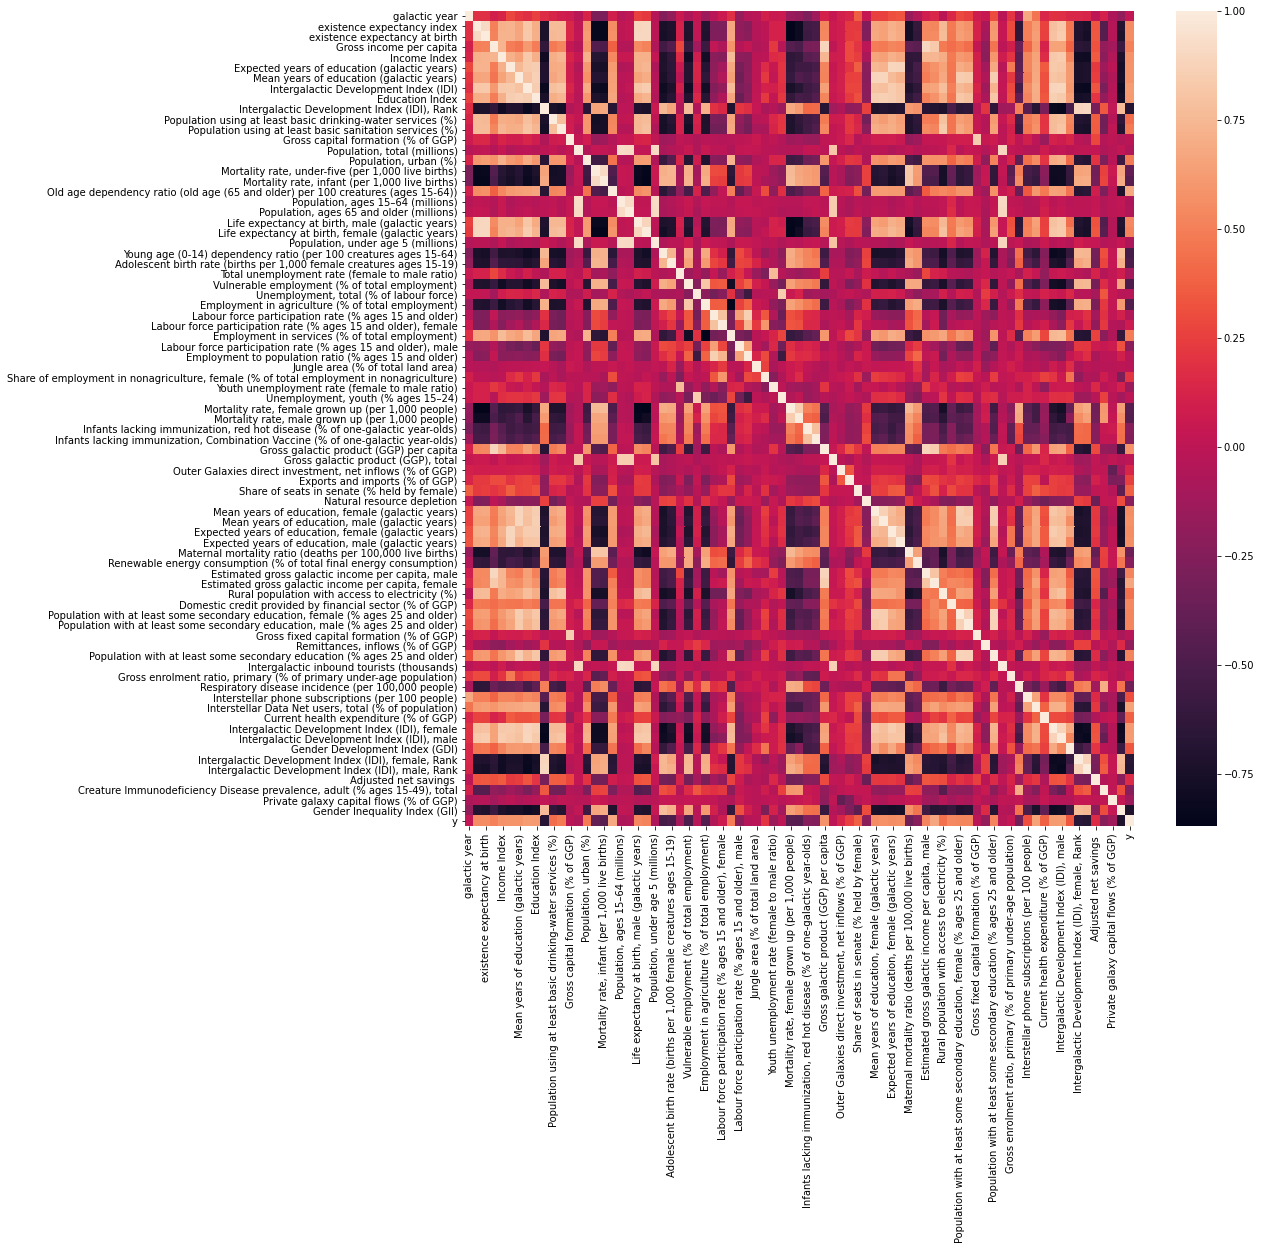

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr());

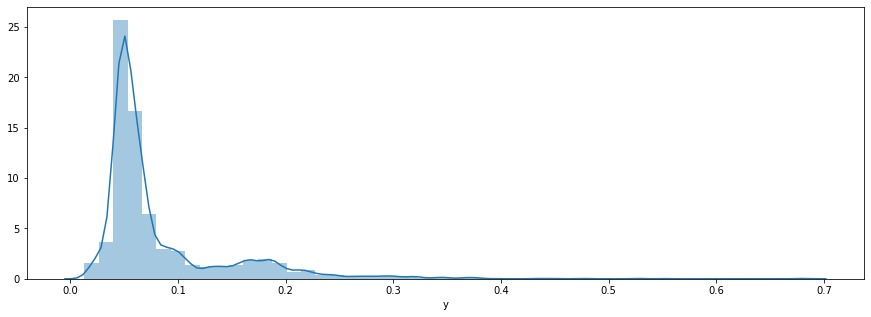

In [12]:
plt.figure(figsize=(15, 5))
sns.distplot(train['y']);

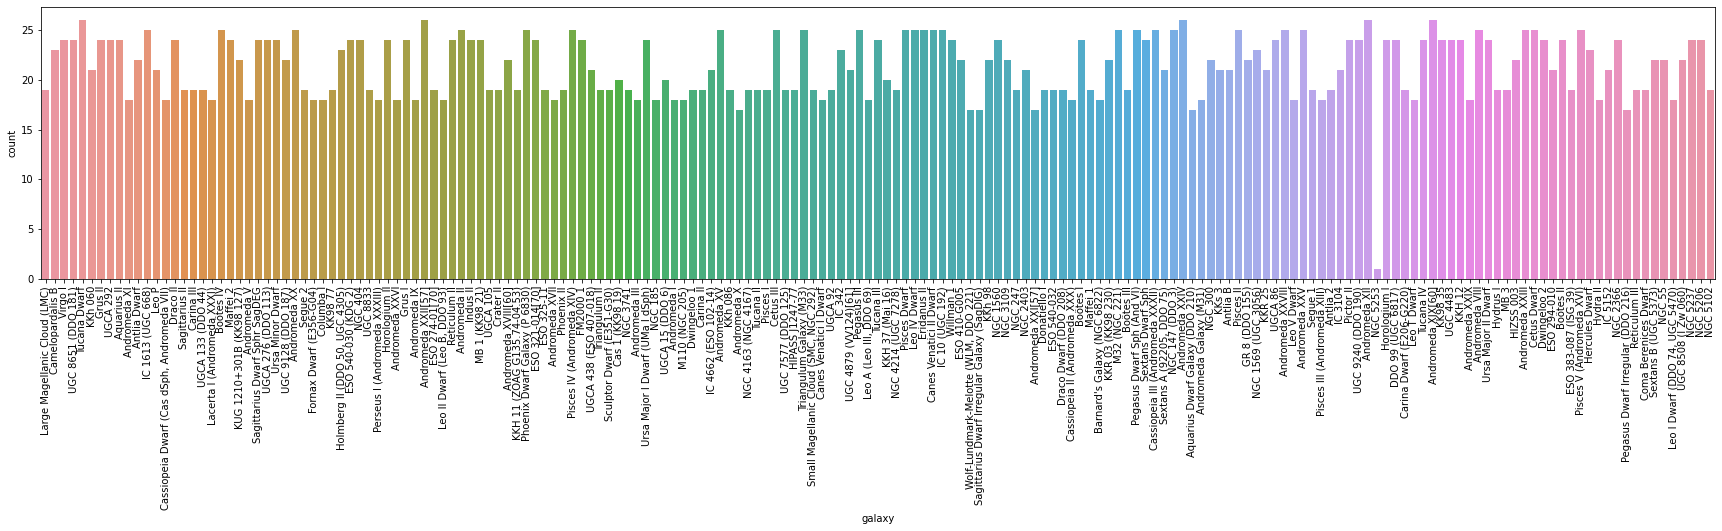

In [13]:
plt.figure(figsize=(30, 5))
galaxy = sns.countplot(train['galaxy'])
galaxy.set_xticklabels(galaxy.get_xticklabels(), rotation=90);
# sns.countplot(test['galaxy'])

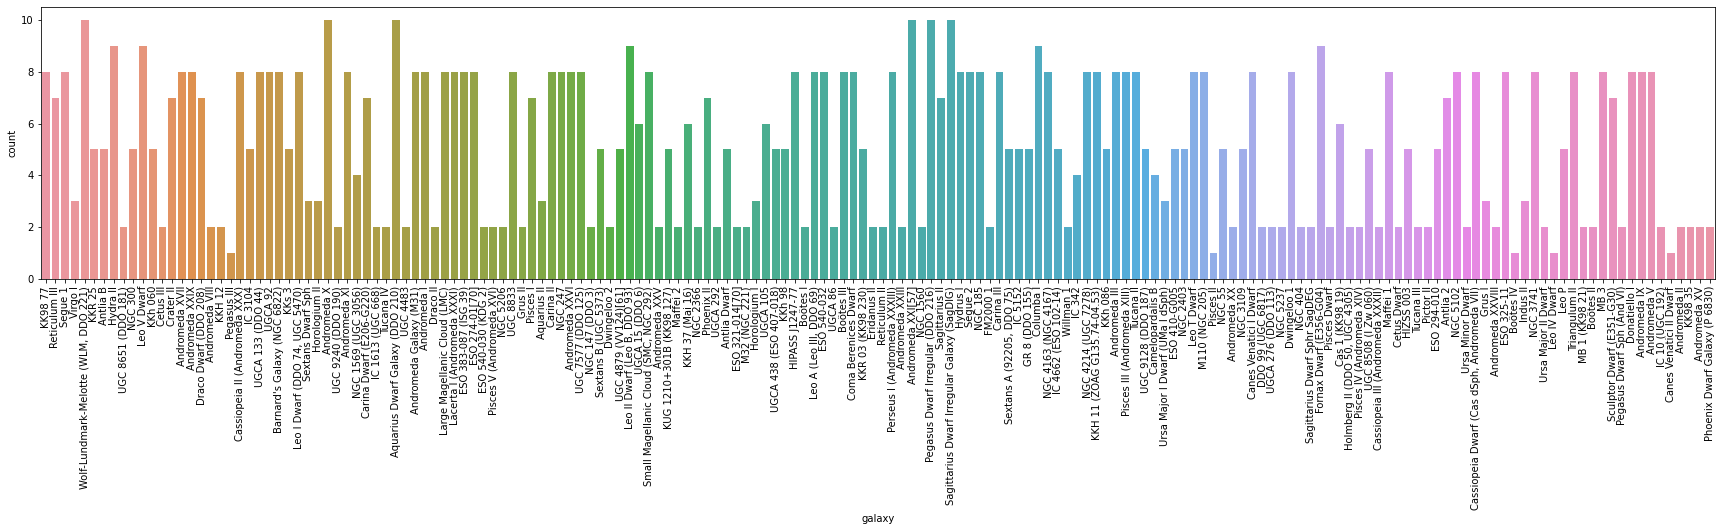

In [14]:
plt.figure(figsize=(30, 5))
galaxy = sns.countplot(test['galaxy'])
galaxy.set_xticklabels(galaxy.get_xticklabels(), rotation=90);

In [15]:
train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False)

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))           0.67998
Estimated gross galactic income per capita, female                                         0.66746
Interstellar Data Net users, total (% of population)                                       0.65182
Intergalactic Development Index (IDI)                                                      0.62511
Intergalactic Development Index (IDI), male                                                0.62270
Intergalactic Development Index (IDI), female                                              0.61497
Education Index                                                                            0.61394
Expected years of education (galactic years)                                               0.58407
Mean years of education (galactic years)                                                   0.58386
Income Index                                                                               0.57997
Gross gala

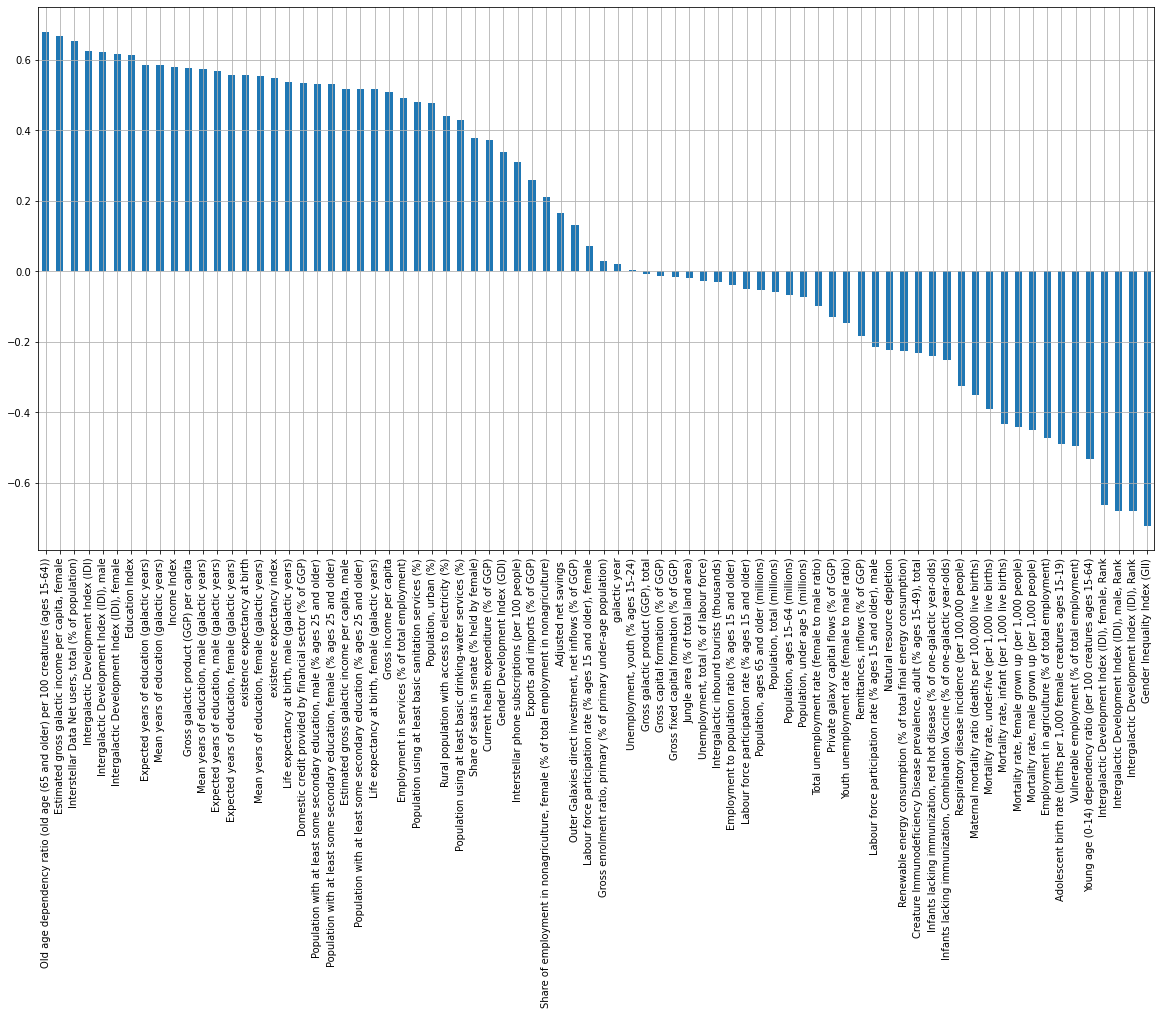

In [16]:
plt.figure(figsize=(20, 10))
correlation_plot = train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False).plot.bar(grid=True)
correlation_plot.set_xticklabels(correlation_plot.get_xticklabels(), rotation=90);

In [17]:
for i in train.columns:
    print(i)

galactic year
galaxy
existence expectancy index
existence expectancy at birth
Gross income per capita
Income Index
Expected years of education (galactic years)
Mean years of education (galactic years)
Intergalactic Development Index (IDI)
Education Index
Intergalactic Development Index (IDI), Rank
Population using at least basic drinking-water services (%)
Population using at least basic sanitation services (%)
Gross capital formation (% of GGP)
Population, total (millions)
Population, urban (%)
Mortality rate, under-five (per 1,000 live births)
Mortality rate, infant (per 1,000 live births)
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))
Population, ages 15–64 (millions)
Population, ages 65 and older (millions)
Life expectancy at birth, male (galactic years)
Life expectancy at birth, female (galactic years)
Population, under age 5 (millions)
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)
Adolescent birth rate (births per 1,000 female 

In [0]:
pd.set_option('display.max_rows', None)

In [0]:
# full_train = train.fillna(train.interpolate(inplace=False))
# full_test = test.fillna(test.interpolate(inplace=False))
# full_train = train.fillna(train.mean())
# full_test = test.fillna(test.mean())

In [20]:
train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False)

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))           0.67998
Estimated gross galactic income per capita, female                                         0.66746
Interstellar Data Net users, total (% of population)                                       0.65182
Intergalactic Development Index (IDI)                                                      0.62511
Intergalactic Development Index (IDI), male                                                0.62270
Intergalactic Development Index (IDI), female                                              0.61497
Education Index                                                                            0.61394
Expected years of education (galactic years)                                               0.58407
Mean years of education (galactic years)                                                   0.58386
Income Index                                                                               0.57997
Gross gala

In [0]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=40)

full_train = imputer.fit_transform(train.drop(['galaxy', 'y'], axis=1))
full_train = pd.DataFrame(data=full_train, columns=train.drop(['galaxy', 'y'], axis=1).columns)
full_train['galaxy'] = train['galaxy']
full_train['y'] = train['y']

full_test = imputer.transform(test.drop(['galaxy'], axis=1))
full_test = pd.DataFrame(data=full_test, columns=test.drop(['galaxy'], axis=1).columns)
full_test['galaxy'] = test['galaxy']

In [22]:
full_train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False)

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))           0.68677
Intergalactic Development Index (IDI), male                                                0.62848
Intergalactic Development Index (IDI)                                                      0.62749
Intergalactic Development Index (IDI), female                                              0.62154
Education Index                                                                            0.61716
Expected years of education, male (galactic years)                                         0.59972
Estimated gross galactic income per capita, female                                         0.59466
Mean years of education, male (galactic years)                                             0.59271
Interstellar Data Net users, total (% of population)                                       0.58807
Mean years of education (galactic years)                                                   0.58776
Mean years

In [0]:
pd.set_option('display.max_rows', 10)

In [0]:
viz_train = full_train.copy()

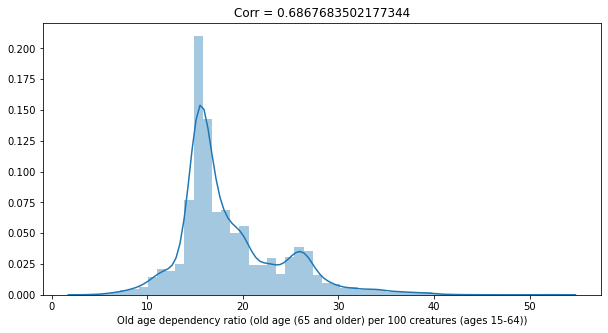

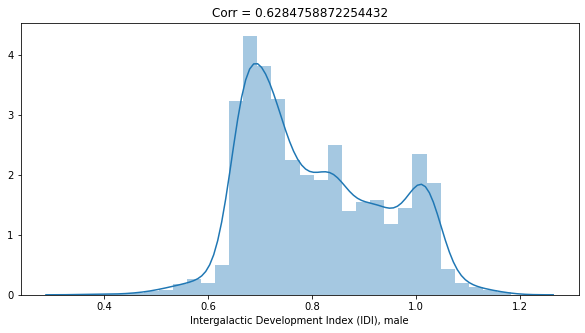

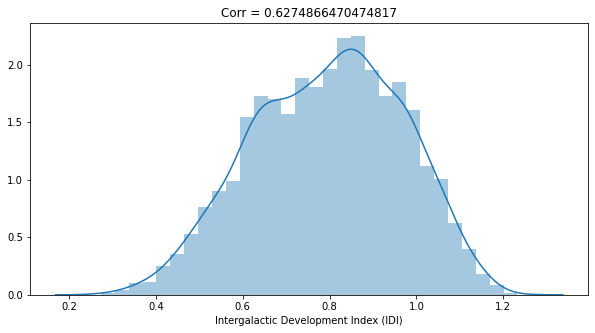

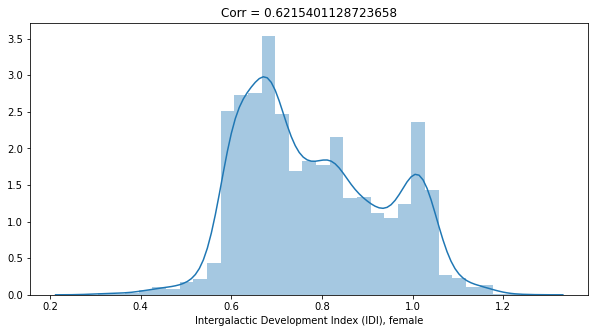

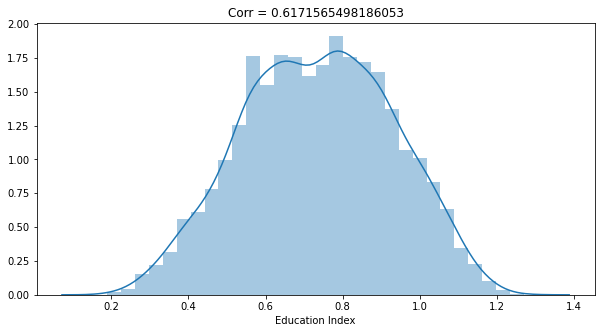

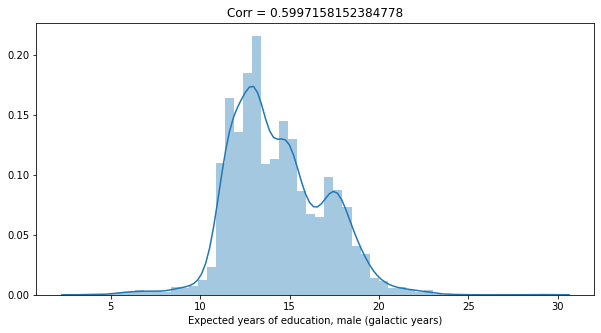

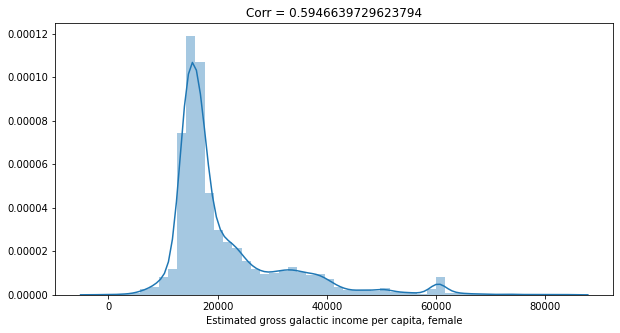

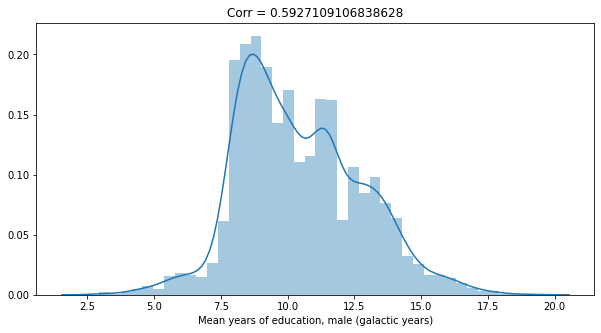

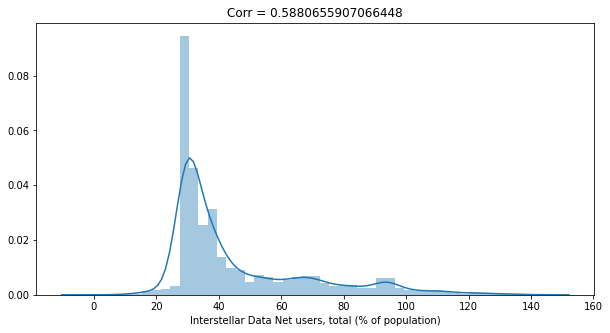

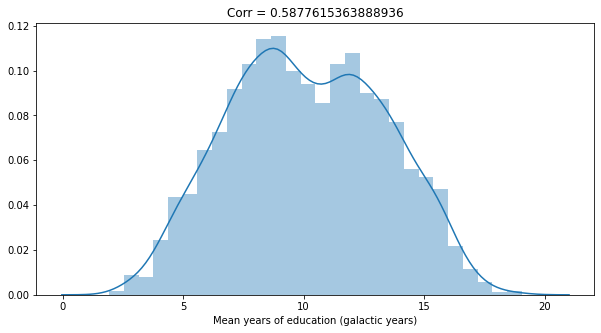

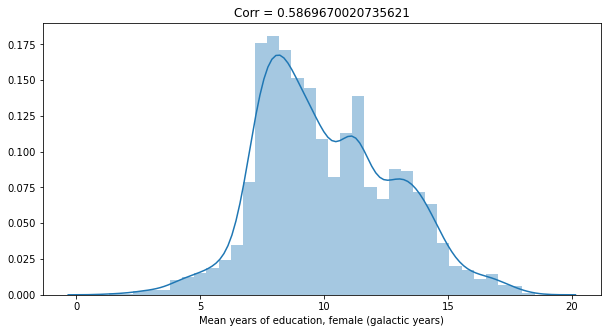

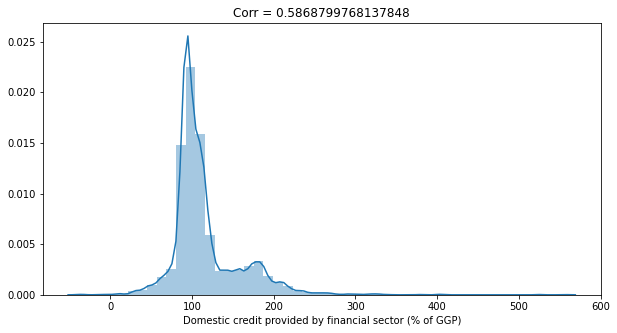

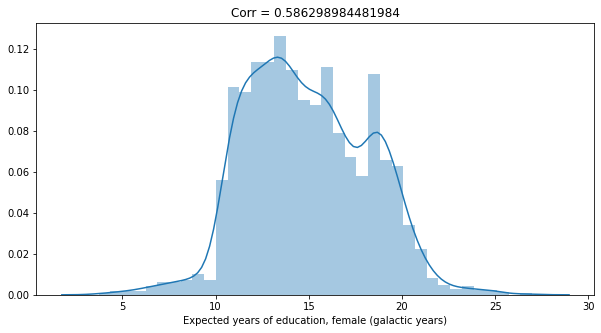

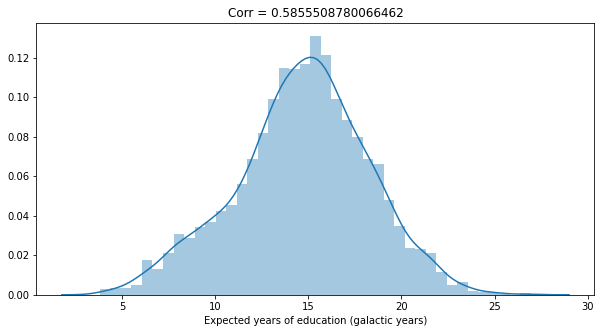

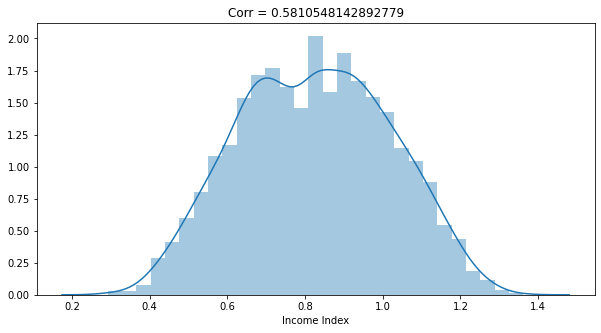

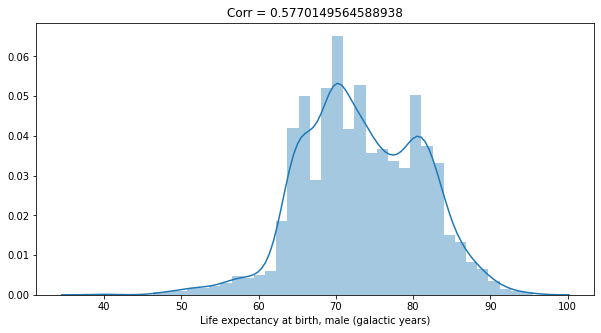

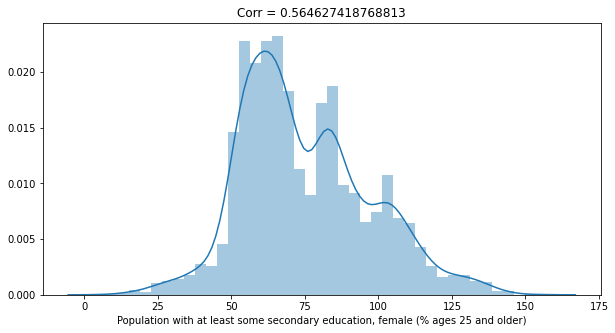

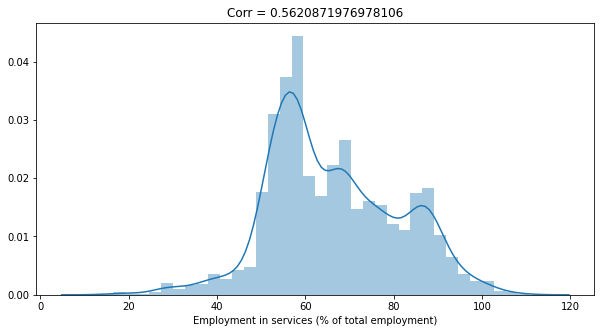

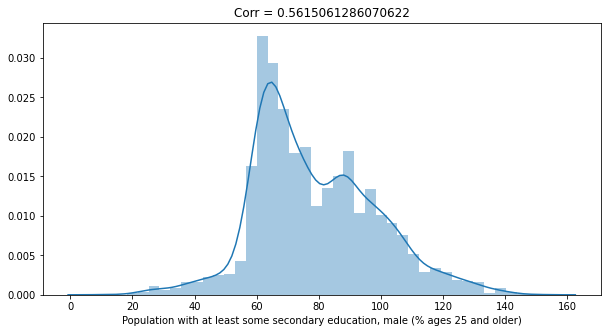

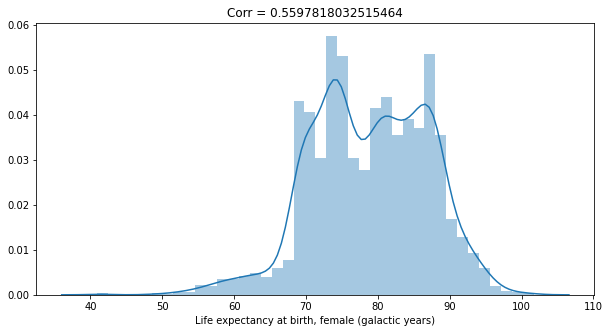

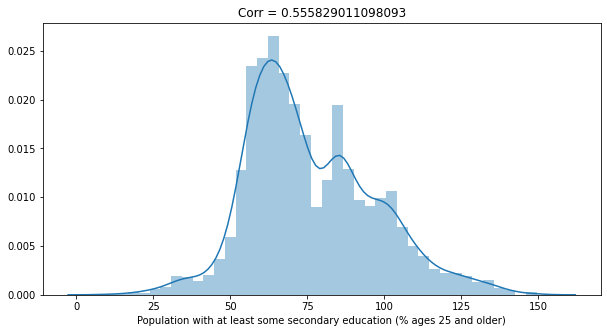

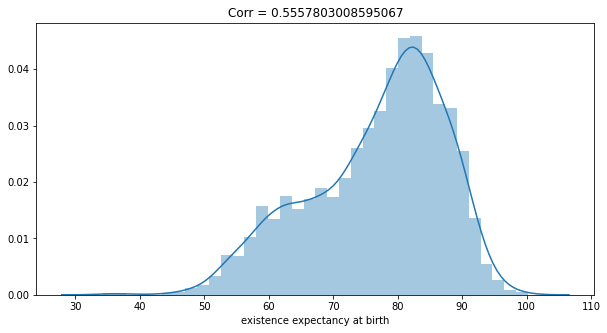

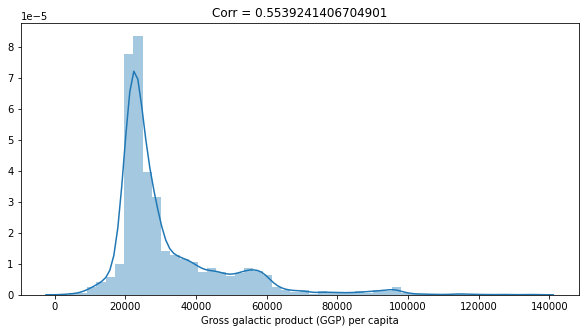

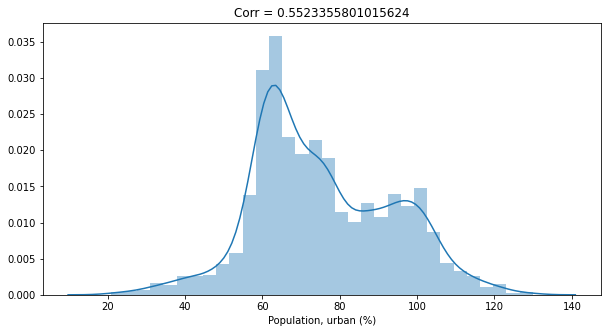

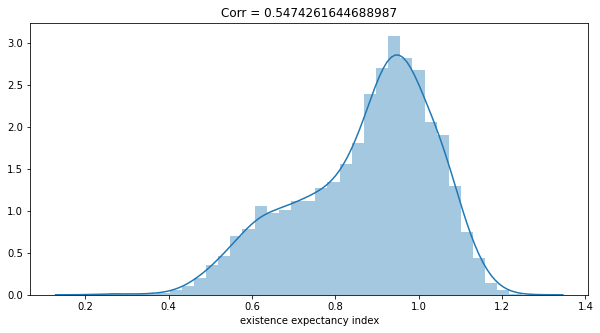

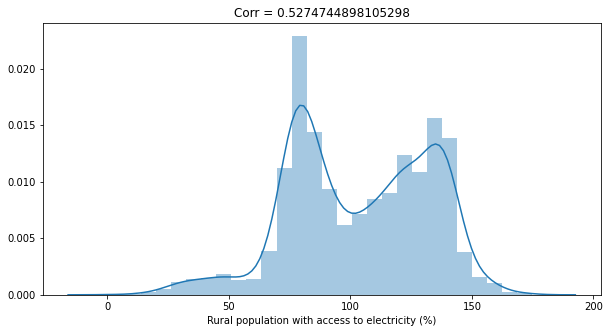

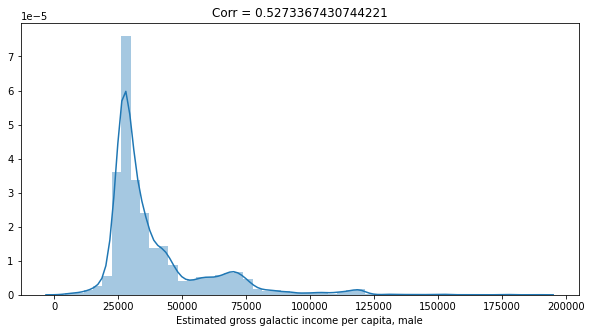

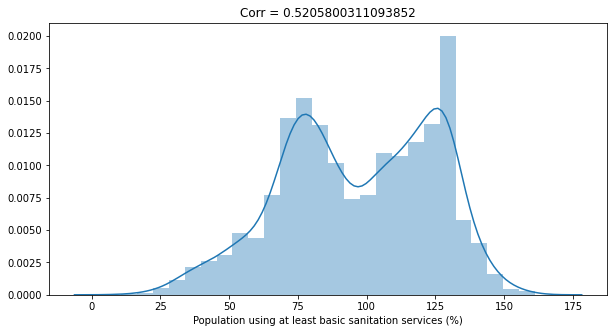

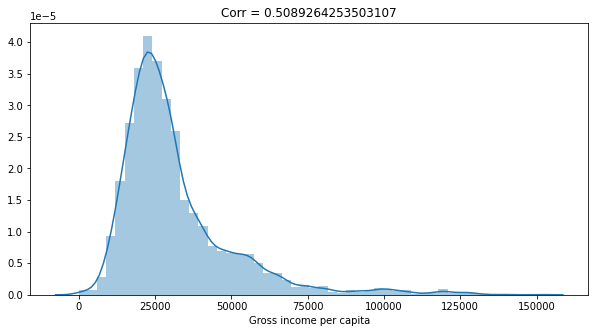

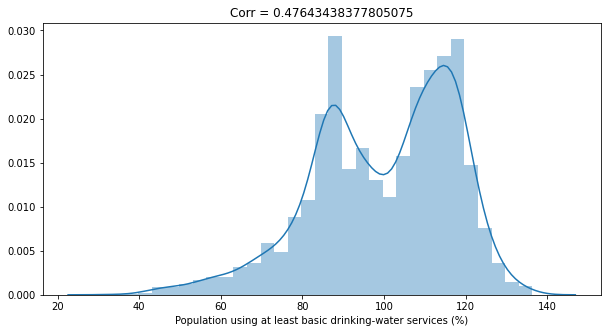

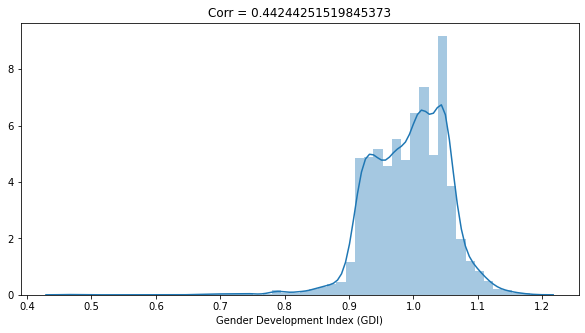

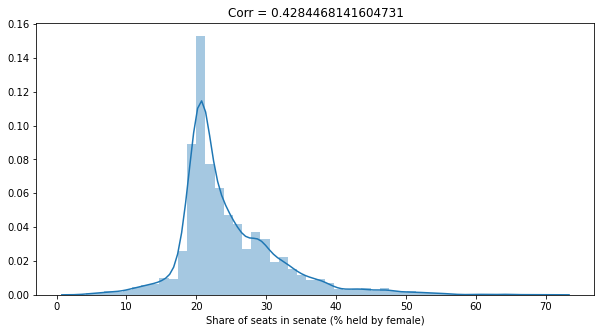

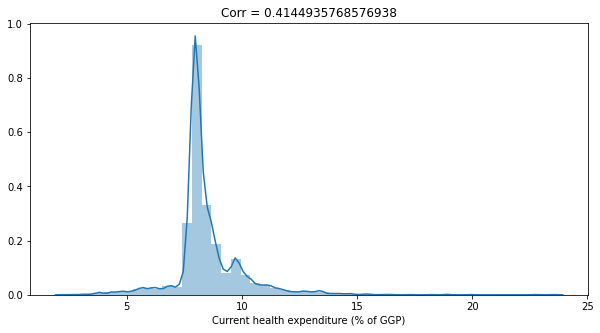

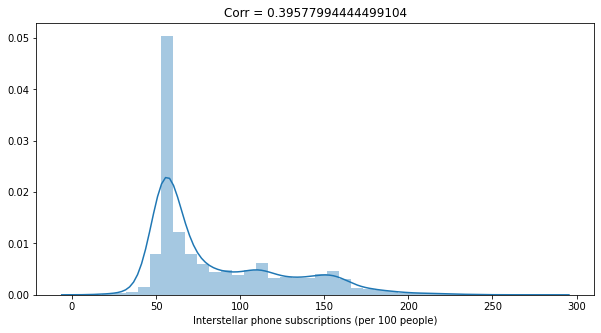

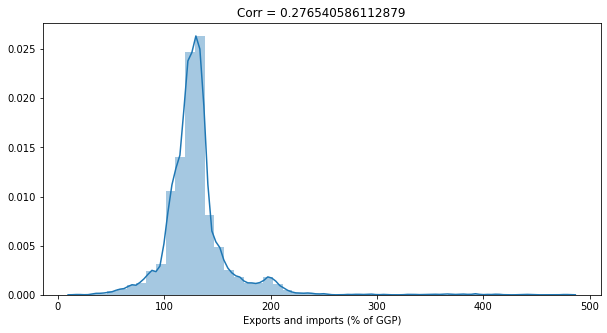

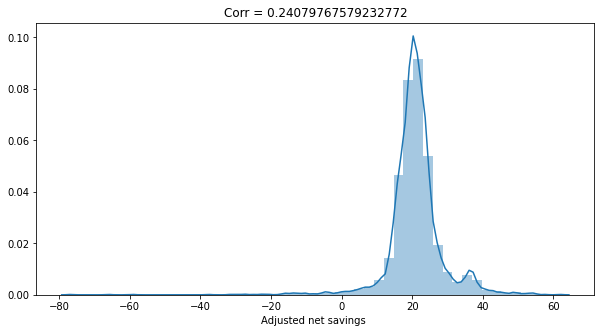

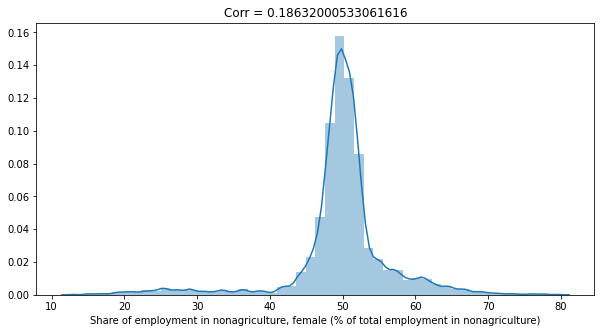

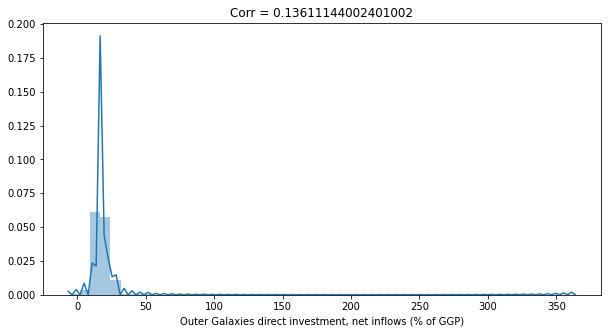

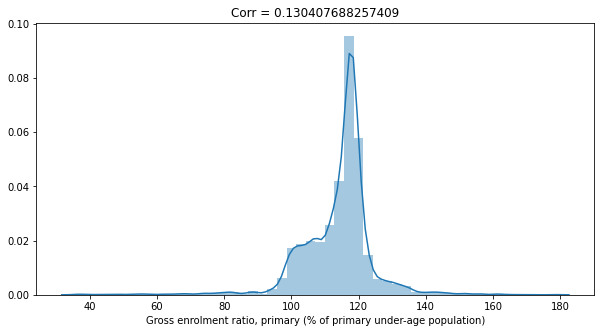

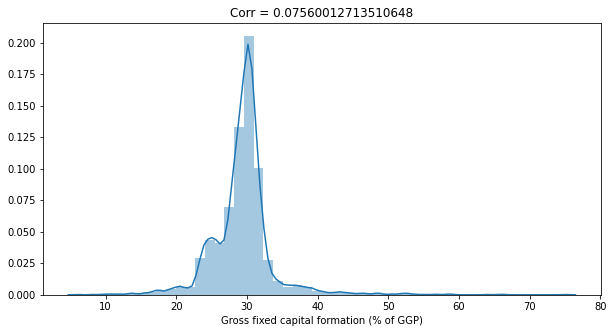

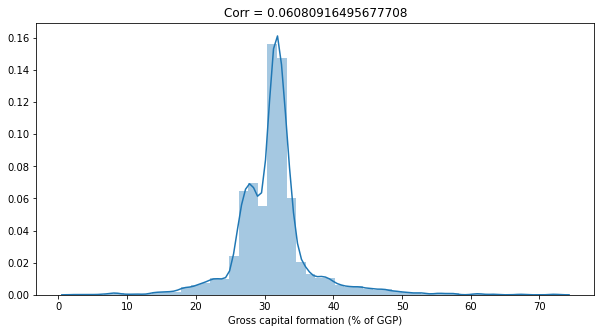

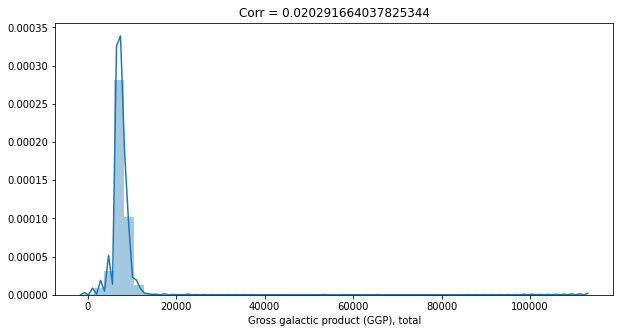

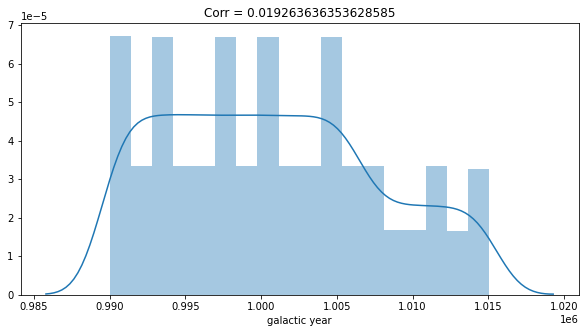

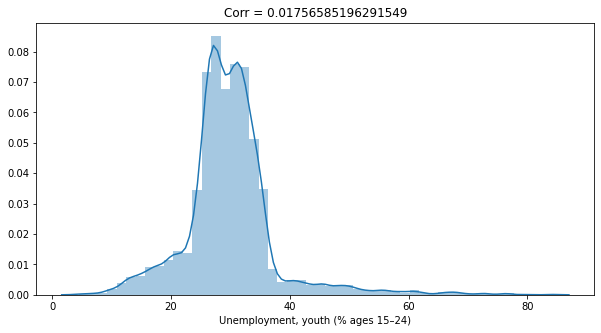

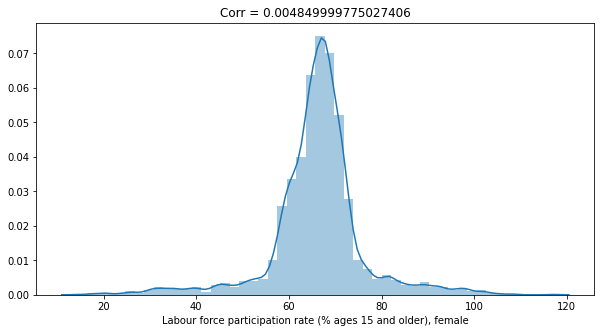

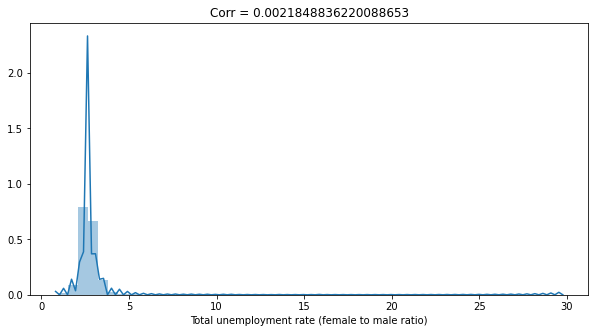

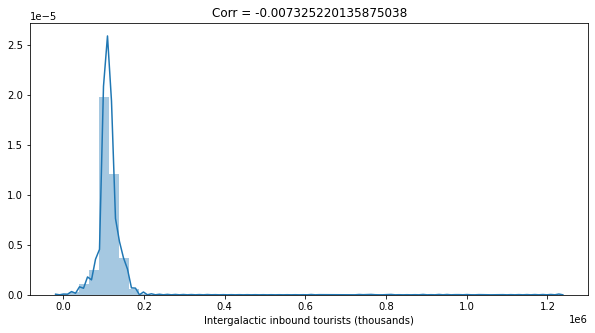

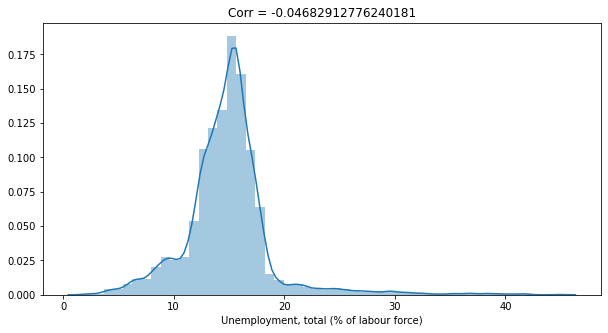

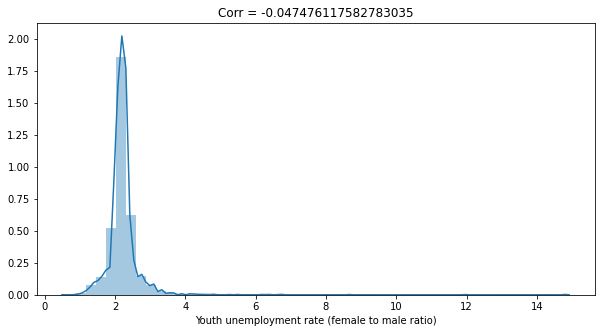

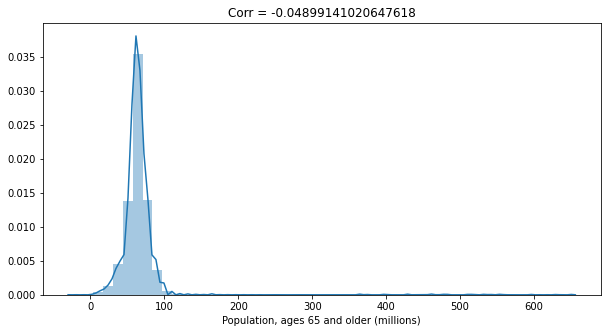

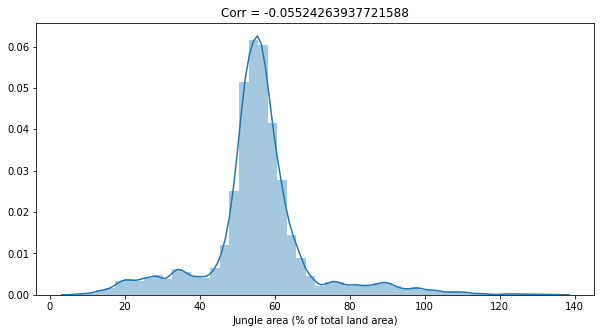

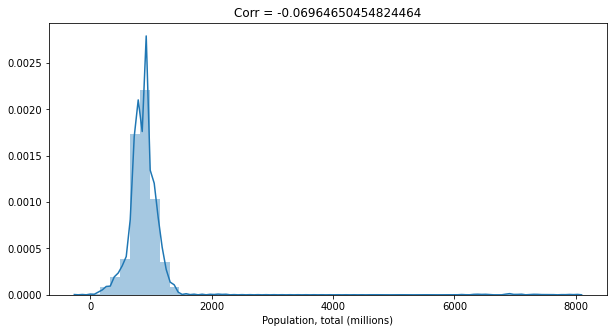

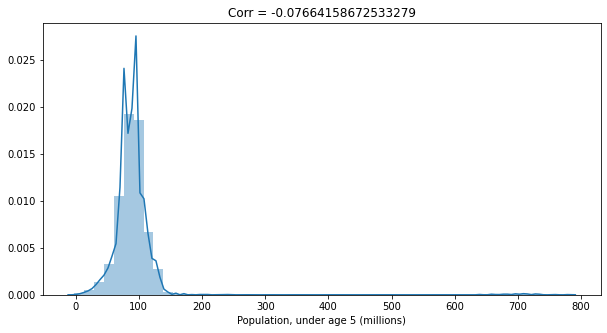

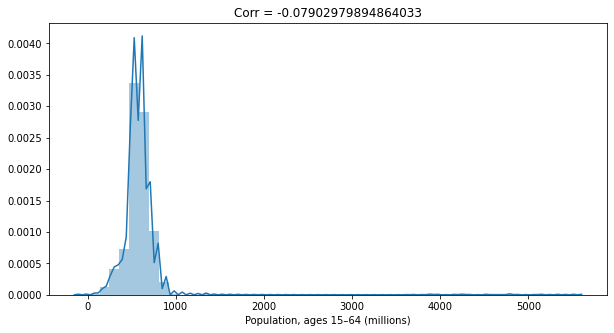

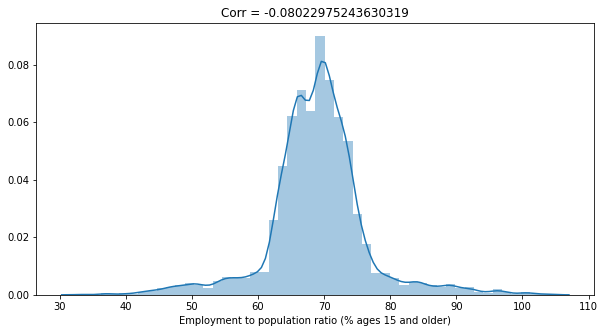

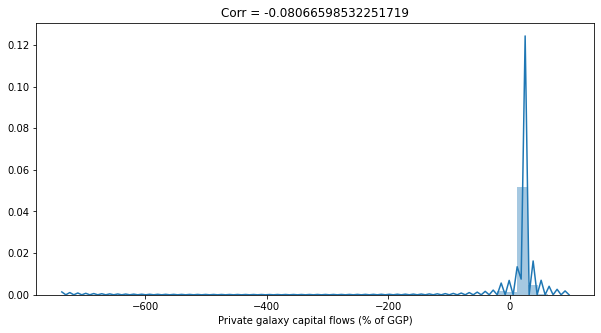

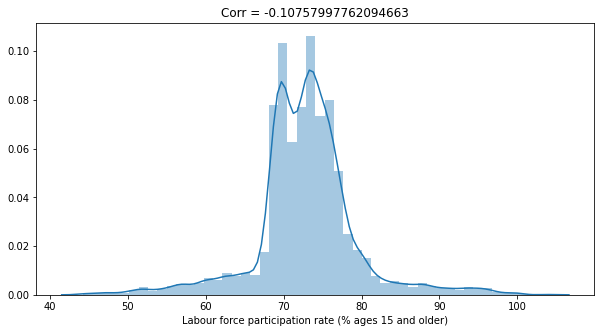

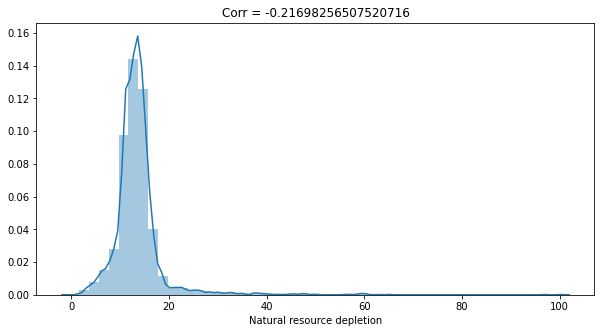

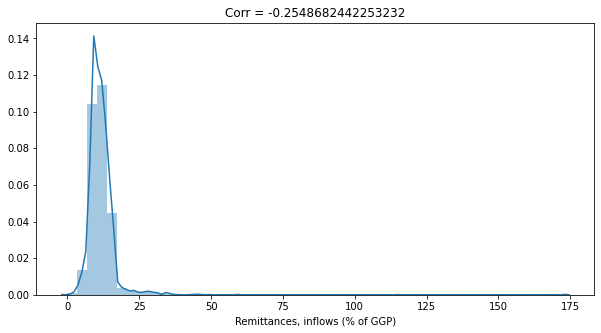

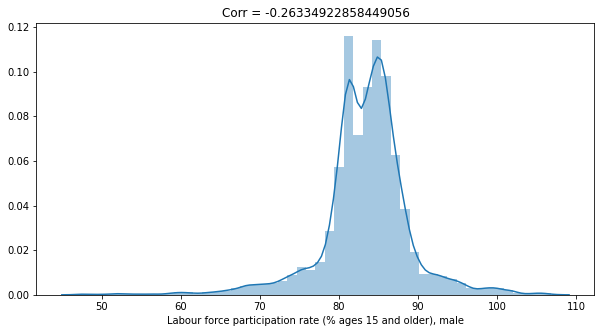

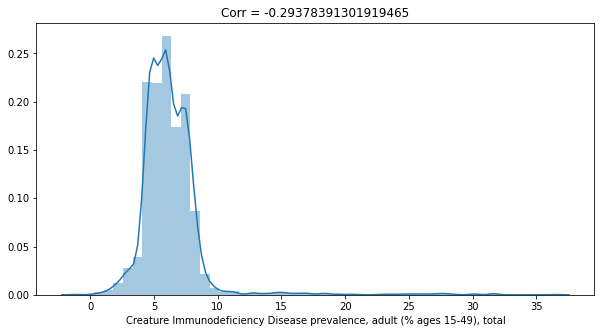

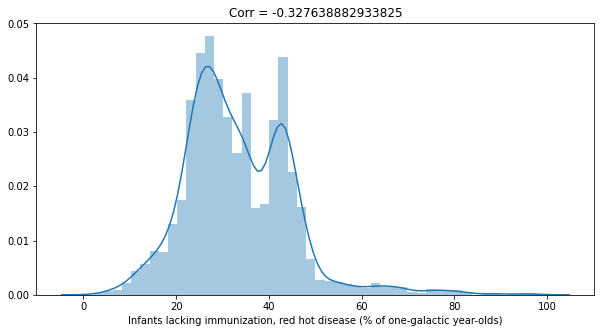

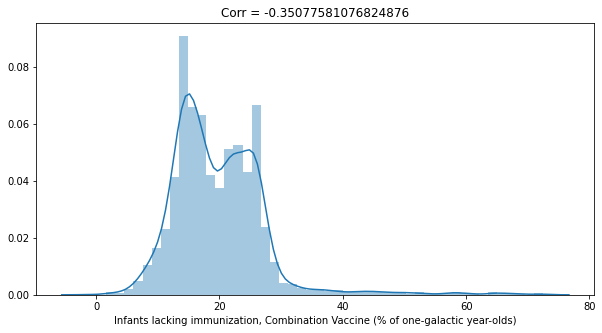

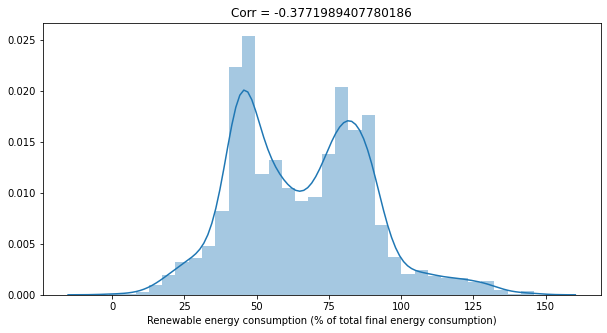

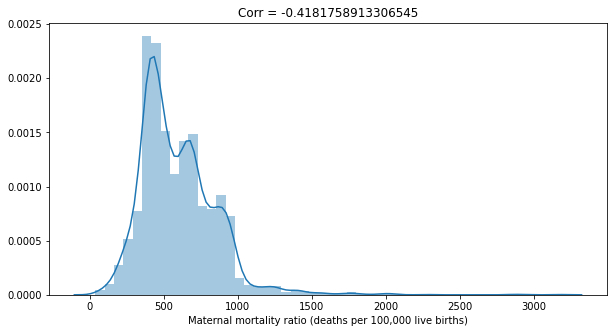

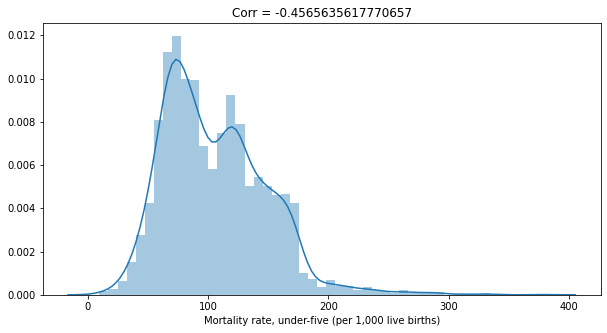

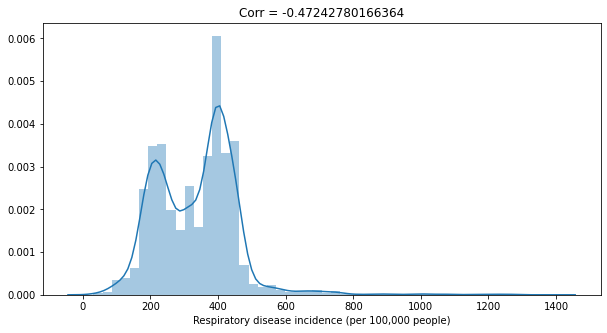

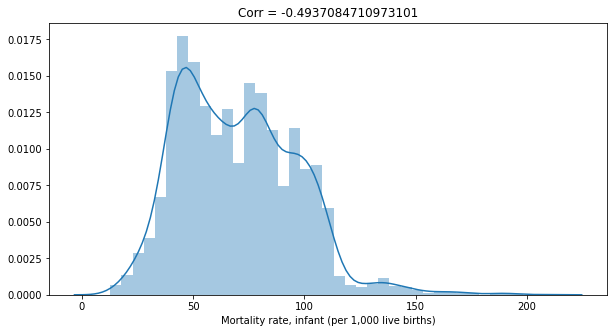

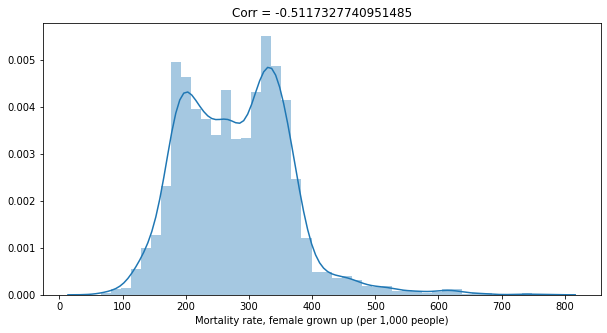

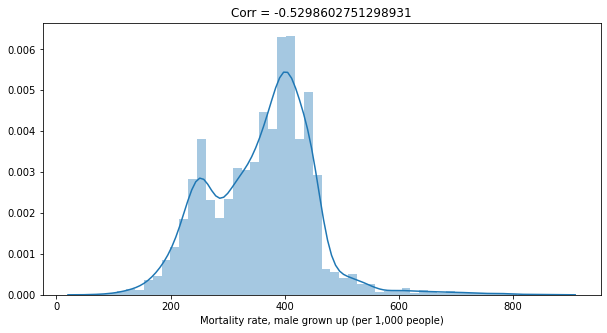

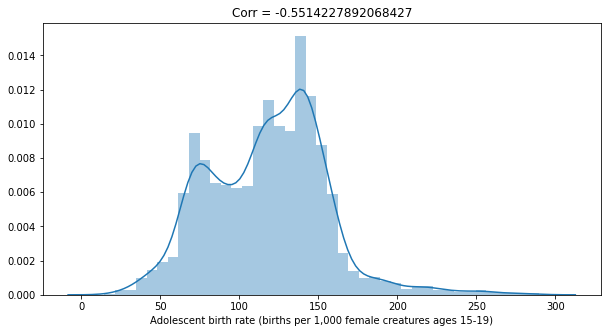

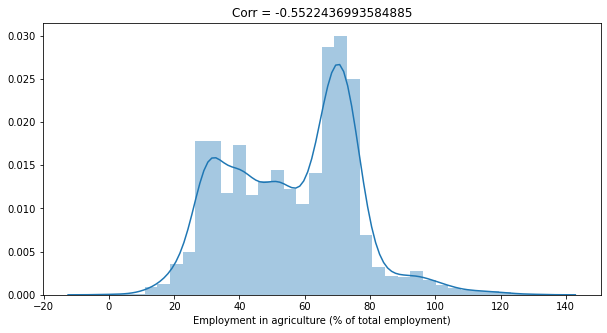

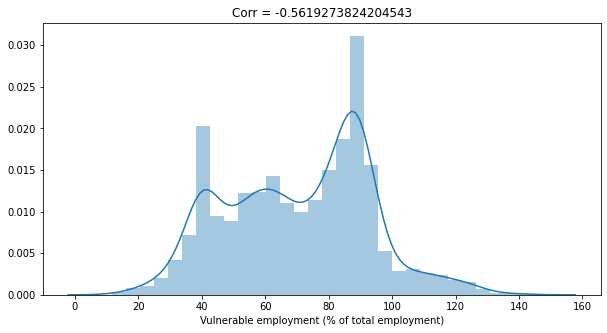

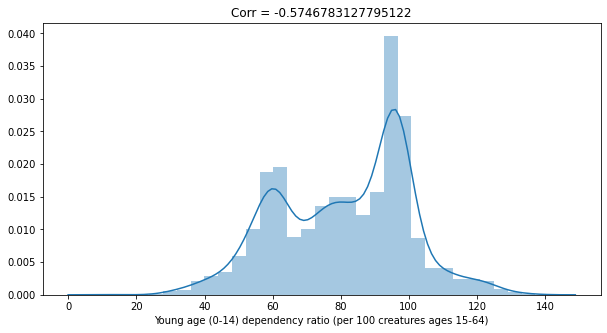

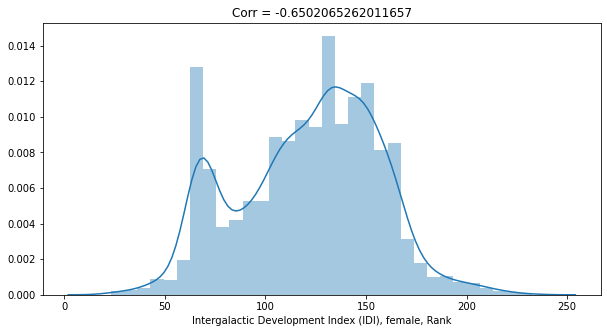

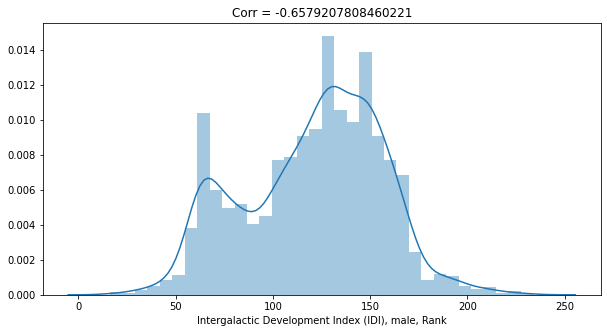

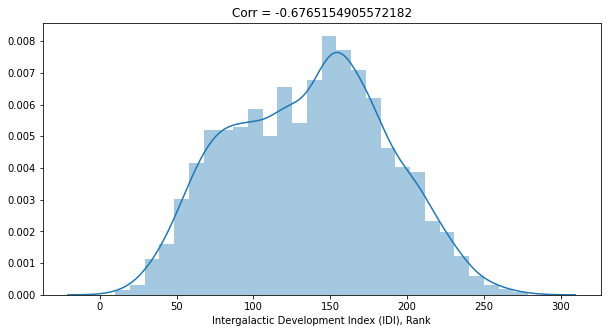

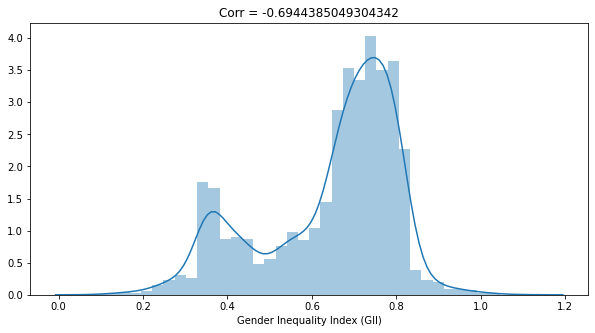

In [25]:
corr_list = sorted(zip(viz_train.drop(['galaxy', 'y'], axis=1).corrwith(train['y']), viz_train.drop(['galaxy', 'y'], axis=1)), reverse=True)
for i, j in corr_list:
    plt.figure(figsize=(10, 5))
    plt.title("Corr = " + str(i))
    sns.distplot(viz_train[j])

In [0]:
# check = pd.DataFrame({
#     "new_feature":0,
#     "ii": train['Income Index'],
#     "pu":train['Population, urban (%)'],
#     "gdi":train['Gender Development Index (GDI)'],
#     "ei":train['Education Index'],
#     "gii":train['Gender Inequality Index (GII)'],
#     "gipc":train['Gross income per capita'],
#     "idi":train['Intergalactic Development Index (IDI)'],
#     "dc":train['Domestic credit provided by financial sector (% of GGP)'],
#     "unemp":train['Unemployment, total (% of labour force)'],
#     "ggp":train['Gross galactic product (GGP), total'],
#     "mrm":train['Mortality rate, male grown up (per 1,000 people)'],
#     "y":train['y']
# })

# check['new_feature'] = np.sqrt(check.pu / check.gii) * np.log(check.gipc) * check.ei * check.ii

# # check['new_feature'] = np.sqrt(check.pu / check.gii) * np.log(check.gipc) * check.ei * check.ii # 0.82

# # check['new_feature'] = (check.pu / check.gii) * np.log(check.gipc) * check.ei * check.ii # 0.81

# # check['new_feature'] = check.idi + check.ei + check.ii / 3 # 0.65

# # check['new_feature'] = check.pu / check.gii # 0.77

# sns.distplot(check['new_feature'])

In [0]:
# sns.distplot(check['y'])

In [0]:
# check.corrwith(train['y'])

In [0]:
full_train['NF1'] = np.sqrt(full_train['Population, urban (%)'] / full_train['Gender Inequality Index (GII)']) * np.log(full_train['Gross income per capita']) * full_train['Education Index'] * full_train['Income Index']
full_test['NF1'] = np.sqrt(full_test['Population, urban (%)'] / full_test['Gender Inequality Index (GII)']) * np.log(full_test['Gross income per capita']) * full_test['Education Index'] * full_test['Income Index']

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_train = scaler.fit_transform(full_train.drop(['galaxy', 'y'], axis=1))
scaled_train = pd.DataFrame(data=scaled_train, columns=full_train.drop(['galaxy', 'y'], axis=1).columns)
scaled_train['galaxy'] = train['galaxy']
scaled_train['y'] = train['y']

scaled_test = scaler.transform(full_test.drop(['galaxy'], axis=1))
scaled_test = pd.DataFrame(data=scaled_test, columns=full_test.drop(['galaxy'], axis=1).columns)
scaled_test['galaxy'] = test['galaxy']

In [31]:
full_train.drop(['galaxy', 'y'], axis=1)

galactic year  ...       NF1
0      990025.00000  ...  23.94883
1      990025.00000  ...  46.48686
2      990025.00000  ...  13.80942
3      990025.00000  ...  22.27746
4      990025.00000  ... 202.35594
...             ...  ...       ...
3860  1015056.00000  ...  90.98972
3861  1015056.00000  ...  97.03232
3862  1015056.00000  ... 212.56969
3863  1015056.00000  ...  40.21189
3864  1015056.00000  ... 201.24297

[3865 rows x 79 columns]

In [32]:
full_test.drop(['galaxy'], axis=1)

galactic year  ...      NF1
0    1007012.00000  ... 27.19026
1    1007012.00000  ... 19.06078
2    1008016.00000  ... 30.14093
3    1007012.00000  ... 39.71239
4    1013042.00000  ... 29.61277
..             ...  ...      ...
885  1016064.00000  ... 92.10794
886  1016064.00000  ... 92.10794
887  1016064.00000  ... 92.10794
888  1016064.00000  ... 92.10794
889  1016064.00000  ... 92.10794

[890 rows x 79 columns]

In [0]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(2)

# poly_train = poly.fit_transform(scaled_train.drop(['galaxy', 'y'], axis=1))
# poly_train = pd.DataFrame(data=poly_train, columns=poly.get_feature_names(scaled_train.columns))
# poly_train['galaxy'] = train['galaxy']
# poly_train['y'] = train['y']

# poly_test = poly.transform(scaled_test.drop(['galaxy'], axis=1))
# poly_test = pd.DataFrame(data=poly_test, columns=poly.get_feature_names(scaled_test.columns))
# poly_test['galaxy'] = test['galaxy']

In [0]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le_galaxy = le.fit_transform(full_train['galaxy'])
# full_train['galaxy'] = le_galaxy
# full_test['galaxy'] = le.transform(full_test['galaxy'])

full_train = pd.concat([full_train, pd.get_dummies(full_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
full_test = pd.concat([full_test, pd.get_dummies(full_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

scaled_train = pd.concat([scaled_train, pd.get_dummies(scaled_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
scaled_test = pd.concat([scaled_test, pd.get_dummies(scaled_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

In [35]:
full_train

galactic year  ...  Wolf-Lundmark-Melotte (WLM, DDO 221)
0      990025.00000  ...                                     0
1      990025.00000  ...                                     0
2      990025.00000  ...                                     0
3      990025.00000  ...                                     0
4      990025.00000  ...                                     0
...             ...  ...                                   ...
3860  1015056.00000  ...                                     0
3861  1015056.00000  ...                                     0
3862  1015056.00000  ...                                     0
3863  1015056.00000  ...                                     0
3864  1015056.00000  ...                                     0

[3865 rows x 261 columns]

In [36]:
from collections import Counter

galaxy_list = []
new_test_galaxy = []
for i in train.galaxy.unique():
    galaxy_list.append(i)
for i in test.galaxy.unique():
    galaxy_list.append(i)

for key, value in Counter(galaxy_list).items():
    if value == 1:
        print(key)
        new_test_galaxy.append(key)

Tucana Dwarf
Andromeda XXII[57]
Andromeda XVIII[60]
Triangulum Galaxy (M33)
Andromeda XXIV
Andromeda XII
NGC 5253
Andromeda XIX[60]
Hercules Dwarf


In [0]:
for i in new_test_galaxy:
    full_test[i] = 0
    scaled_test[i] = 0

In [0]:
full_train = full_train.reindex(sorted(full_train.columns), axis=1)
full_test = full_test.reindex(sorted(full_test.columns), axis=1)

scaled_train = scaled_train.reindex(sorted(scaled_train.columns), axis=1)
scaled_test = scaled_test.reindex(sorted(scaled_test.columns), axis=1)

In [39]:
scaled_train

Adjusted net savings   ...       y
0                   0.10074  ... 0.05259
1                  -0.23556  ... 0.05987
2                   0.01629  ... 0.05045
3                  -0.76887  ... 0.04939
4                   1.17932  ... 0.15425
...                     ...  ...     ...
3860                0.69112  ... 0.04232
3861               -0.04926  ... 0.03672
3862                0.91015  ... 0.16627
3863                2.28959  ... 0.02419
3864                0.29533  ... 0.10007

[3865 rows x 261 columns]

In [0]:
# full_train = full_train.drop(['galaxy', 'galactic year'], axis=1)
# full_test = full_test.drop(['galaxy', 'galactic year'], axis=1)
# scaled_train = scaled_train.drop(['galaxy', 'galactic year'], axis=1)
# scaled_test = scaled_test.drop(['galaxy', 'galactic year'], axis=1)

In [0]:
def normilize_column_names(string):
    new = ""
    for i in string:
        if i.isalnum() == True or i == " ":
            new += i
    return new

new_names = {}
for i in full_train.columns:
    new_names[i] = normilize_column_names(i)

full_train.rename(columns=new_names, inplace=True)
full_test.rename(columns=new_names, inplace=True)

scaled_train.rename(columns=new_names, inplace=True)
scaled_test.rename(columns=new_names, inplace=True)

In [0]:
full_train.dropna(inplace=True)
full_test.dropna(inplace=True)

scaled_train.dropna(inplace=True)
scaled_test.dropna(inplace=True)

In [43]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_cols', None)
full_train.NF1.describe()

count   3864.00000
mean      82.16034
std       61.74854
min        7.47625
25%       35.80324
50%       62.43658
75%      108.51501
max      460.13801
Name: NF1, dtype: float64

# Models

In [0]:
import xgboost
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [0]:
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(['y'], axis=1), full_train['y'], test_size=0.33, random_state=42)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_train.drop(['y'], axis=1), scaled_train['y'], test_size=0.33, random_state=42)

In [0]:
model_error = {}

In [47]:
%%time
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

pred_lr = model_lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lr))
r2_lr = r2_score(y_test_scaled, pred_lr)
model_error['LinearRegression'] = lr_rmse
print(lr_rmse, r2_lr)

0.012509393844738322 0.9598768785619209
CPU times: user 93 ms, sys: 36.1 ms, total: 129 ms
Wall time: 82.7 ms


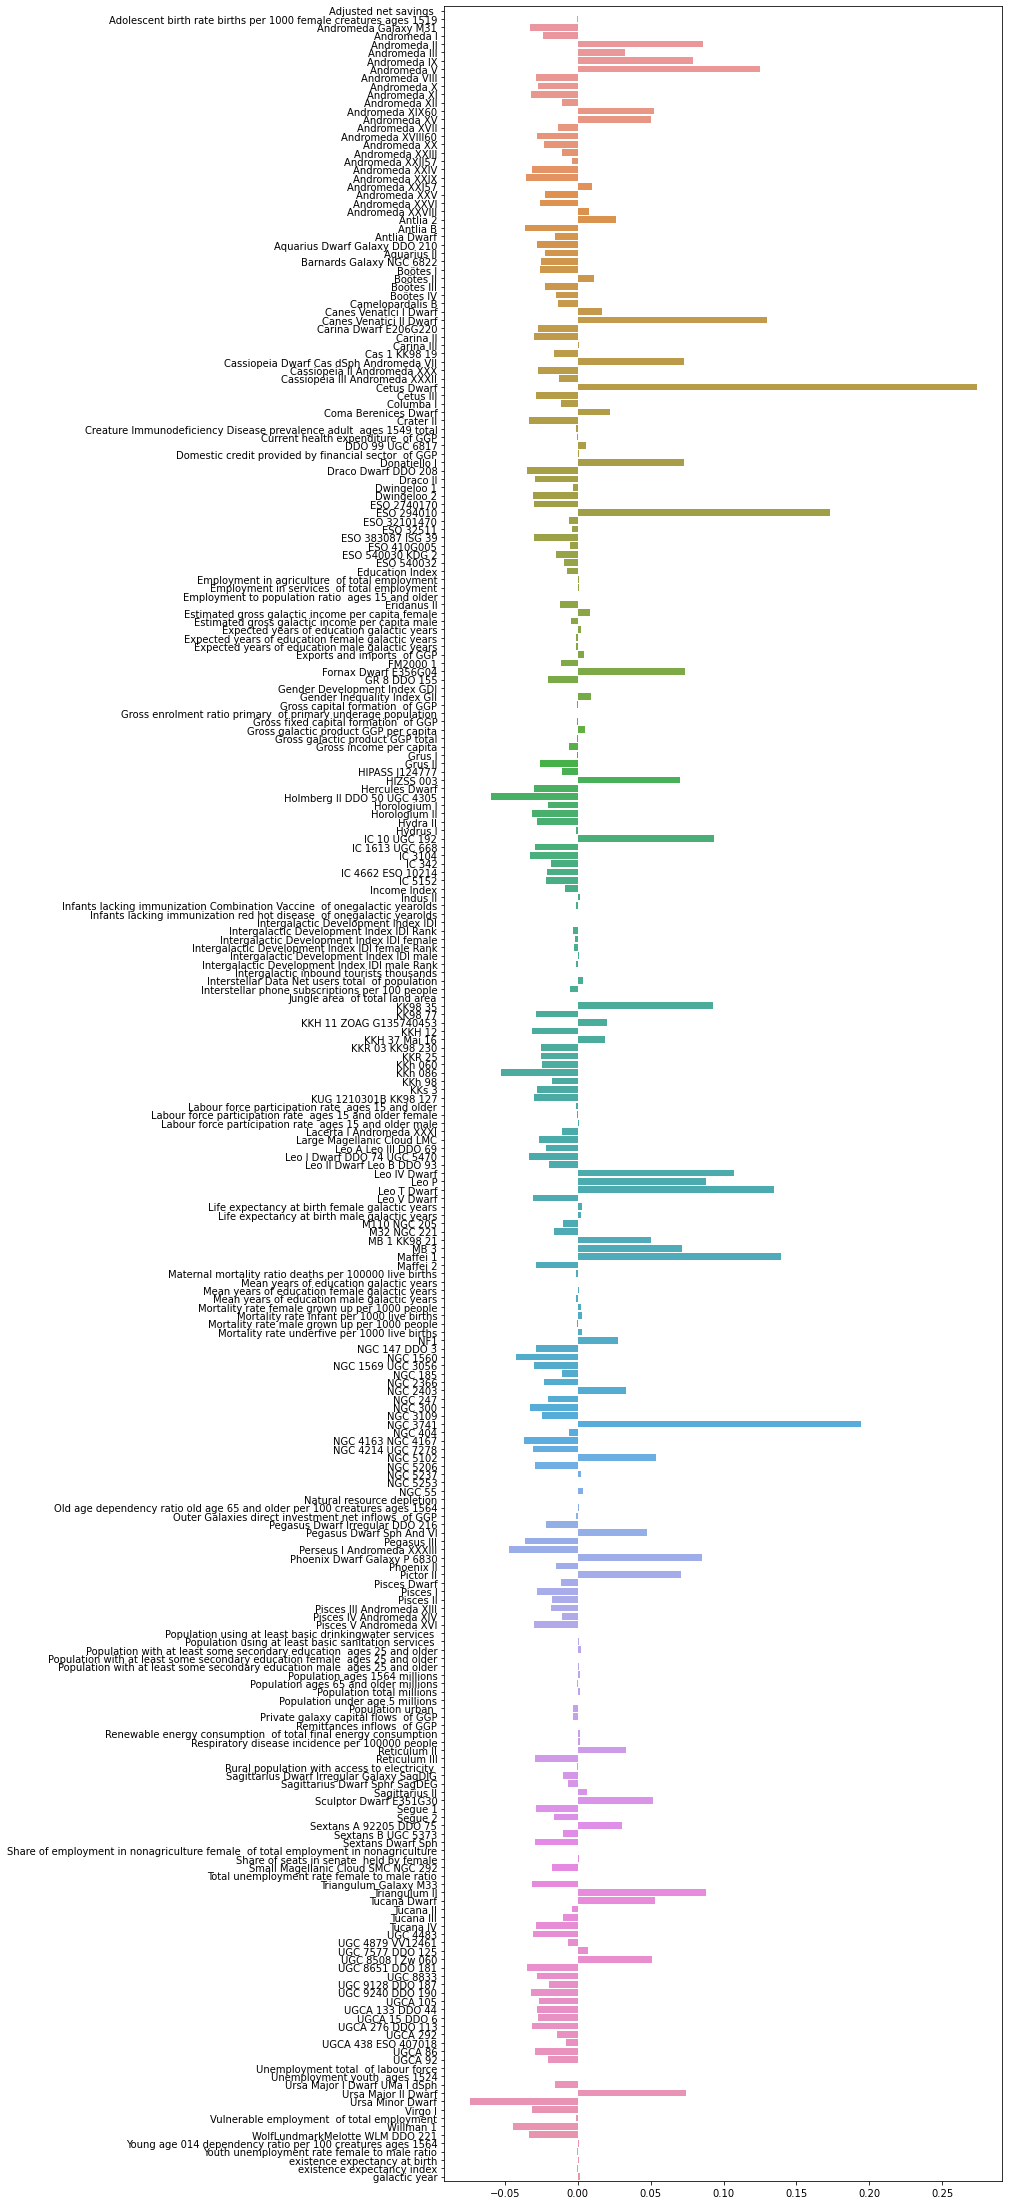

In [48]:
plt.figure(figsize=(10, 40))
sns.barplot(x=model_lr.coef_, y=scaled_train.drop(['y'], axis=1).columns);

In [49]:
%%time
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train_scaled, y_train_scaled)

pred_ridge = model_ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_ridge))
r2_ridge = r2_score(y_test_scaled, pred_ridge)
model_error['Ridge LinearRegression'] = ridge_rmse
print(ridge_rmse, r2_ridge)

0.013120232595725331 0.9558627522253904
CPU times: user 34.3 ms, sys: 40 ms, total: 74.3 ms
Wall time: 86.8 ms


In [50]:
%%time
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train_scaled, y_train_scaled)

pred_lasso = model_lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lasso))
r2_lasso = r2_score(y_test_scaled, pred_lasso)
model_error['Lasso LinearRegression'] = lasso_rmse
print(lasso_rmse, r2_lasso)

0.06248032400885711 -0.0009415699729518057
CPU times: user 17.7 ms, sys: 10.6 ms, total: 28.3 ms
Wall time: 16.2 ms


In [51]:
%%time
model_lsvr = LinearSVR()
model_lsvr.fit(X_train_scaled, y_train_scaled)

pred_lsvr = model_lsvr.predict(X_test_scaled)
lsvr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lsvr))
r2_lsvr = r2_score(y_test_scaled, pred_lsvr)
model_error['Linear SVRegressor'] = lsvr_rmse
print(lsvr_rmse, r2_lsvr)

0.014821096401545076 0.9436773805999281
CPU times: user 809 ms, sys: 81.1 ms, total: 890 ms
Wall time: 793 ms


In [52]:
%%time
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train_scaled)

pred_svr = model_svr.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_svr))
r2_svr = r2_score(y_test_scaled, pred_svr)
model_error['SVRegressor'] = svr_rmse
print(svr_rmse, r2_svr)

0.06179207459708775 0.020988635960644375
CPU times: user 254 ms, sys: 84.2 ms, total: 338 ms
Wall time: 244 ms


In [53]:
%%time
model_sgd = SGDRegressor()
model_sgd.fit(X_train_scaled, y_train_scaled)

pred_sgd = model_sgd.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_sgd))
r2_sgd = r2_score(y_test_scaled, pred_sgd)
model_error['SGDRegressor'] = sgd_rmse
print(sgd_rmse, r2_sgd)

0.03169535839086109 0.7424191844552158
CPU times: user 28.1 ms, sys: 1.12 ms, total: 29.3 ms
Wall time: 28.6 ms


In [54]:
%%time
model_xgboost = xgboost.XGBRegressor(max_depth=8)
model_xgboost.fit(X_train, y_train)

pred_xgb = model_xgboost.predict(X_test)
xgboost_rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)
model_error['XGBoost'] = xgboost_rmse
print(xgboost_rmse, r2_xgb)

[13:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.018124058800081784 0.9157765348798969
CPU times: user 5.11 s, sys: 58 ms, total: 5.16 s
Wall time: 5.14 s


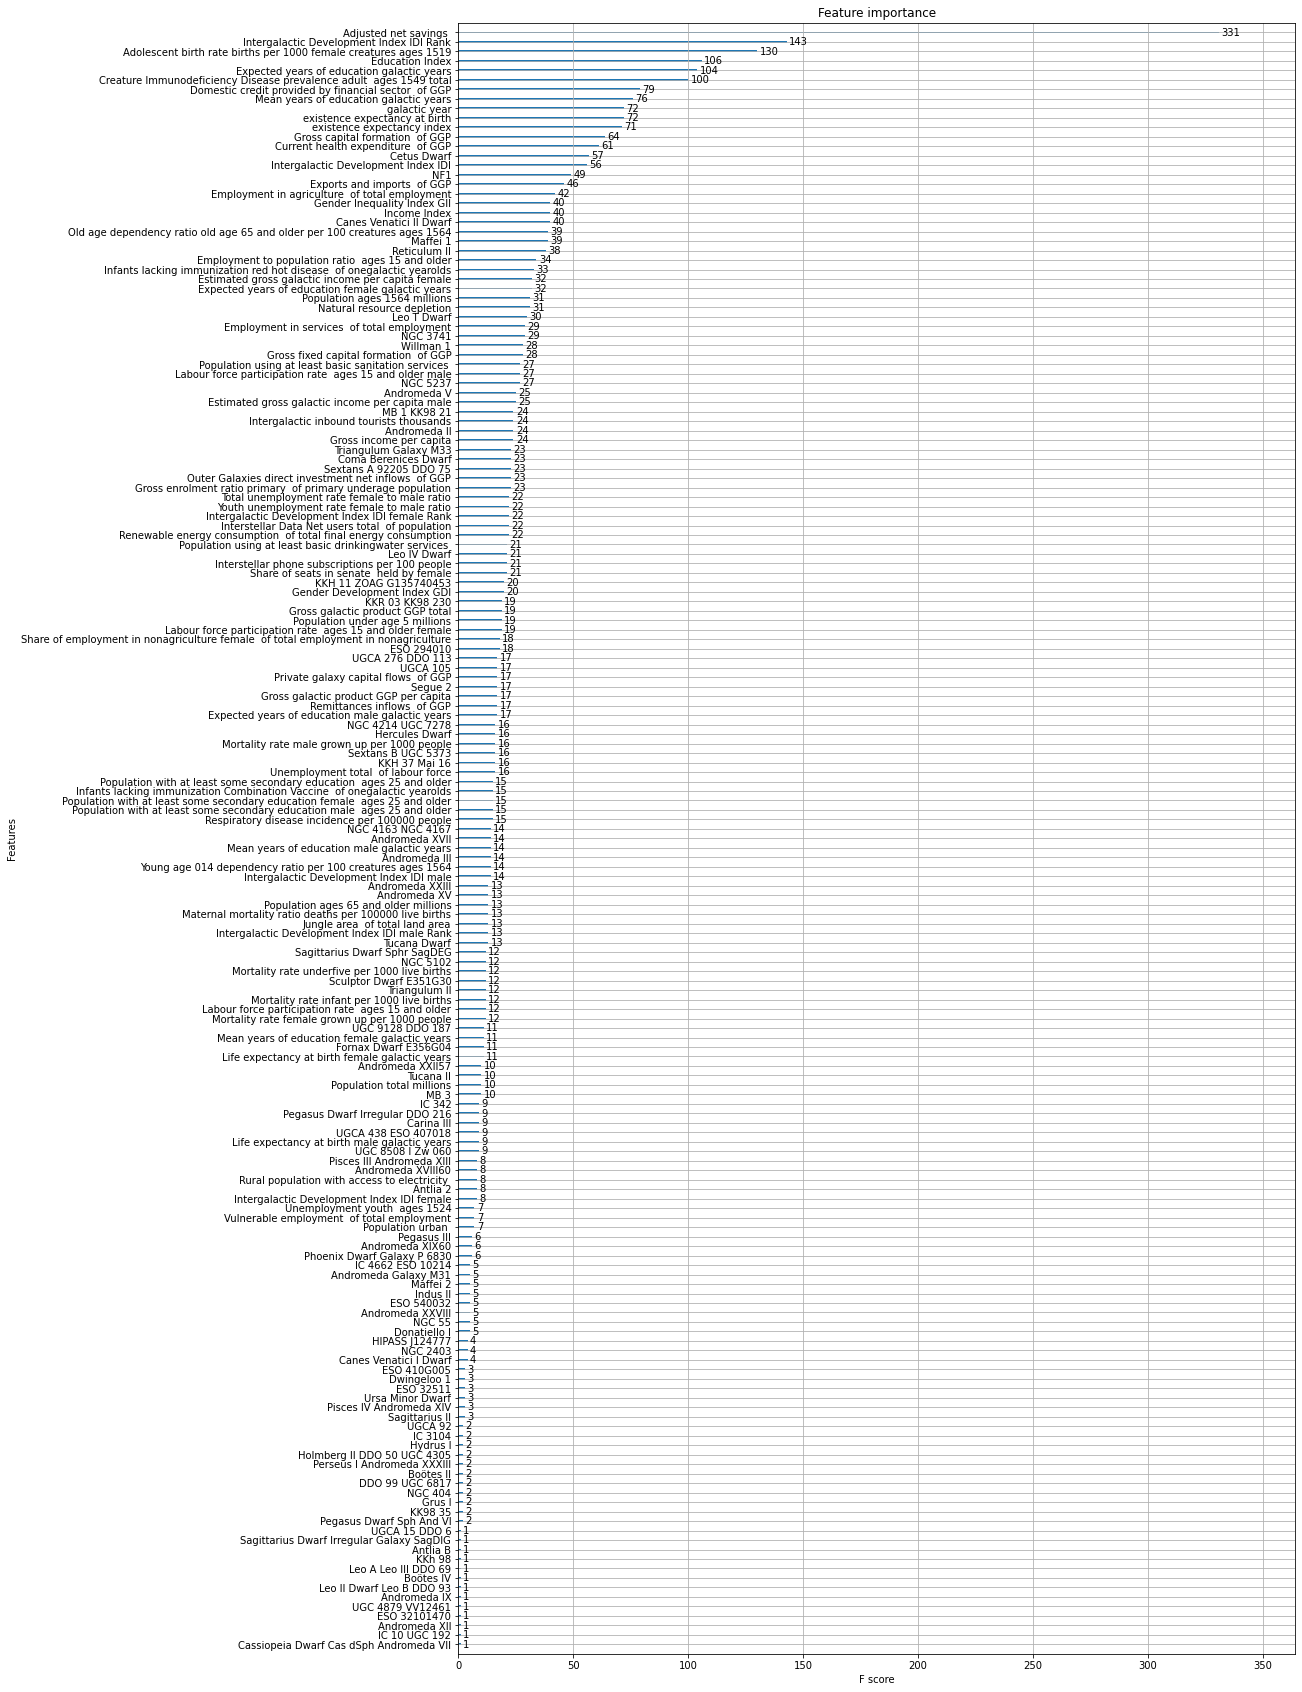

In [55]:
plt.rcParams["figure.figsize"] = (15, 30)
xgboost.plot_importance(model_xgboost) # график важности признаков

In [56]:
%%time
model_rf = RandomForestRegressor(n_estimators=200)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)
model_error['RandomForest'] = rf_rmse
print(rf_rmse, r2_rf)

0.020956514706133814 0.8873943211397155
CPU times: user 35.7 s, sys: 3.74 ms, total: 35.7 s
Wall time: 35.8 s


In [57]:
full_rmse = 0
for key, value in model_error.items():
  full_rmse += value
  print("RMSE ошибка модели {} - {}".format(key, str(value)))
print("Среднее качество моделей - {}".format(str(full_rmse / len(model_error))))

RMSE ошибка модели LinearRegression - 0.012509393844738322
RMSE ошибка модели Ridge LinearRegression - 0.013120232595725331
RMSE ошибка модели Lasso LinearRegression - 0.06248032400885711
RMSE ошибка модели Linear SVRegressor - 0.014821096401545076
RMSE ошибка модели SVRegressor - 0.06179207459708775
RMSE ошибка модели SGDRegressor - 0.03169535839086109
RMSE ошибка модели XGBoost - 0.018124058800081784
RMSE ошибка модели RandomForest - 0.020956514706133814
Среднее качество моделей - 0.029437381668128787


# Submission

# LinearRegression

In [0]:
pd.set_option('display.max_rows', 10)

In [59]:
pred_index_lr = model_lr.predict(scaled_test)
sub_lr = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_lr,
    'opt_pred':0,
    'eei':full_test['existence expectancy index']
})
n_low_eei_lr = sub_lr.loc[sub_lr.eei < 0.7].shape[0]
n_high_eei_lr = sub_lr.loc[sub_lr.eei >= 0.7].shape[0]
print(n_low_eei_lr, n_high_eei_lr)
sub_lr.loc[sub_lr.eei < 0.7, 'opt_pred'] = 80           # 66*80 = 5280 - >10%, <100 each
sub_lr.loc[sub_lr.eei >= 0.7, 'opt_pred'] = ((50000 - (n_low_eei_lr * 80)) / n_high_eei_lr)        # The rest to high eei gs
sub_lr = sub_lr.drop('eei', axis=1)

66 824


In [60]:
sub_lr.to_csv('sub_lr.csv', index=False)
sub_lr.head()

Index    pred  opt_pred
0      0 0.04110  80.00000
1      1 0.03418  80.00000
2      2 0.03383  80.00000
3      3 0.03772  80.00000
4      4 0.03444  80.00000

In [61]:
sub_lr.opt_pred.sum()

49999.99999999999

In [62]:
sub_lr.loc[sub_lr.opt_pred > 99]

Empty DataFrame
Columns: [Index, pred, opt_pred]
Index: []

In [63]:
sub_lr.loc[sub_lr.opt_pred < 1]

Empty DataFrame
Columns: [Index, pred, opt_pred]
Index: []

# XGBoost

In [64]:
pred_index_xgb = model_xgboost.predict(full_test)
sub_xgb = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_xgb,
    'opt_pred':0,
    'eei':full_test['existence expectancy index']
})
n_low_eei_xgb = sub_xgb.loc[sub_xgb.eei < 0.7].shape[0]
n_high_eei_xgb = sub_xgb.loc[sub_xgb.eei >= 0.7].shape[0]
print(n_low_eei_xgb, n_high_eei_xgb)
sub_xgb.loc[sub_xgb.eei < 0.7, 'opt_pred'] = 99
sub_xgb.loc[sub_xgb.eei >= 0.7, 'opt_pred'] = ((50000 - (n_low_eei_xgb * 99)) / n_high_eei_xgb) # The rest to high eei gs
sub_xgb = sub_xgb.drop('eei', axis=1)

66 824


In [65]:
sub_xgb.to_csv('sub_xgb.csv', index=False)
sub_xgb.head()

Index    pred  opt_pred
0      0 0.04011  99.00000
1      1 0.03947  99.00000
2      2 0.04010  99.00000
3      3 0.04134  99.00000
4      4 0.02426  99.00000

In [66]:
sub_xgb

Index    pred  opt_pred
0        0 0.04011  99.00000
1        1 0.03947  99.00000
2        2 0.04010  99.00000
3        3 0.04134  99.00000
4        4 0.02426  99.00000
..     ...     ...       ...
885    885 0.04060  52.75000
886    886 0.04060  52.75000
887    887 0.03800  52.75000
888    888 0.04233  52.75000
889    889 0.04060  52.75000

[890 rows x 3 columns]

In [67]:
sub_xgb.opt_pred.sum()

50000.0

In [68]:
sub_xgb.loc[sub_xgb.opt_pred > 99]

Empty DataFrame
Columns: [Index, pred, opt_pred]
Index: []

In [69]:
sub_xgb.loc[sub_xgb.opt_pred < 1]

Empty DataFrame
Columns: [Index, pred, opt_pred]
Index: []

# Оптимизация решения

In [70]:
pred_index_opt = model_lr.predict(scaled_test)
sub_opt = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_opt,
    'std_opt_pred':0,
    'opt_pred':0,
    'eei':full_test['existence expectancy index'],
    'potential_for_index_increase':-np.log(pred_index_opt + 0.01) + 3
})

energy_to_low_galaxy = 76 # 76 * 66 = 5016 = 10%
energy_to_high_galaxies = 40000
extra_energy = 50000 - energy_to_high_galaxies 

n_low_eei_opt = sub_opt.loc[sub_opt.eei < 0.7].shape[0]
n_high_eei_opt = sub_opt.loc[sub_opt.eei >= 0.7].shape[0]

print(n_low_eei_opt, n_high_eei_opt, (energy_to_high_galaxies - (n_low_eei_opt * energy_to_low_galaxy)) / n_high_eei_opt)

sub_opt.loc[sub_opt.eei < 0.7, 'std_opt_pred'] = energy_to_low_galaxy

sub_opt.loc[sub_opt.eei >= 0.7, 'std_opt_pred'] = (energy_to_high_galaxies - (n_low_eei_opt * energy_to_low_galaxy)) / n_high_eei_opt

sub_opt['index_increase'] = np.log10(extra_energy * sub_opt['potential_for_index_increase'] ** 2 / 1000)

sub_opt['opt_pred_increase'] = (sub_opt['std_opt_pred'] / 10) * sub_opt['index_increase']

sub_opt['opt_pred'] = sub_opt['std_opt_pred'] + sub_opt['opt_pred_increase']

# sub_opt['opt_pred_clip'] = sub_opt.opt_pred.clip(0, 99)
print(sub_opt.std_opt_pred.sum())
print(sub_opt.opt_pred.sum())

sub_opt.head()

66 824 42.45631067961165
40000.0
49978.851213792506


Index    pred  ...  index_increase  opt_pred_increase
0      0 0.04110  ...         2.55252           19.39915
1      1 0.03418  ...         2.57344           19.55811
2      2 0.03383  ...         2.57457           19.56675
3      3 0.03772  ...         2.56242           19.47437
4      4 0.03444  ...         2.57259           19.55172

[5 rows x 8 columns]

In [71]:
sub_opt.loc[sub_opt.eei >= 0.7]

Index    pred  ...  index_increase  opt_pred_increase
66      66 0.03392  ...         2.57427           10.92941
67      67 0.03427  ...         2.57314           10.92462
68      68 0.03367  ...         2.57509           10.93289
69      69 0.04709  ...         2.53625           10.76800
70      70 0.04603  ...         2.53902           10.77974
..     ...     ...  ...             ...                ...
885    885 0.04417  ...         2.54401           10.80092
886    886 0.05340  ...         2.52058           10.70147
887    887 0.07010  ...         2.48457           10.54858
888    888 0.06454  ...         2.49582           10.59633
889    889 0.04573  ...         2.53982           10.78316

[824 rows x 8 columns]

In [72]:
sub_opt.describe()

Index      pred  ...  index_increase  opt_pred_increase
count 890.00000 890.00000  ...       890.00000          890.00000
mean  444.50000   0.08183  ...         2.49042           11.21219
std   257.06517   0.07097  ...         0.09901            2.38742
min     0.00000   0.00645  ...         2.15246            9.13857
25%   222.25000   0.03888  ...         2.45482           10.42226
50%   444.50000   0.05403  ...         2.51909           10.69686
75%   666.75000   0.08648  ...         2.55897           10.88559
max   889.00000   0.45345  ...         2.70341           20.01138

[8 rows x 8 columns]

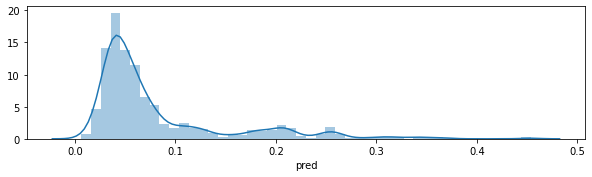

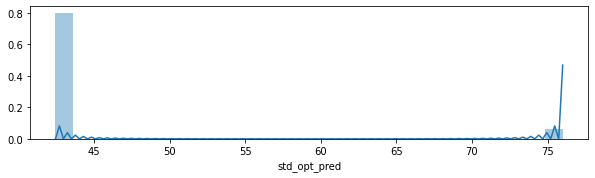

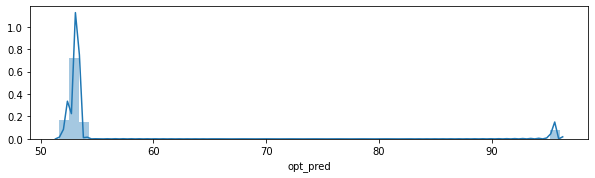

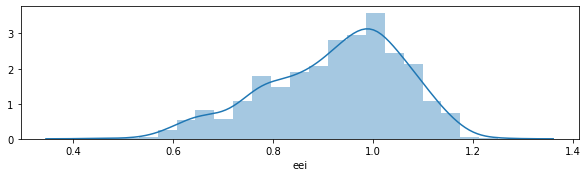

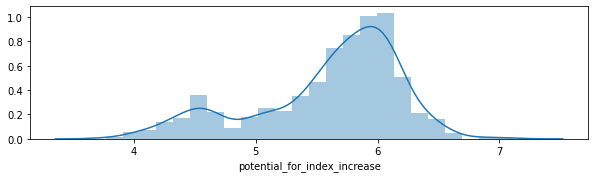

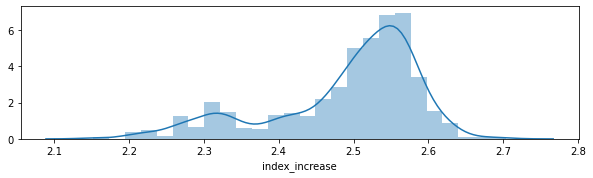

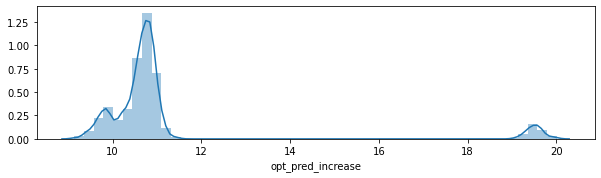

In [73]:
j = 1
for i in sub_opt.drop(['Index'], axis=1).columns:
    plt.figure(figsize=(10, 20))
    plt.subplot(7, 1, j)
    sns.distplot(sub_opt[i])
    j += 1

In [74]:
sub_opt = sub_opt.drop(['eei', 'potential_for_index_increase', 'std_opt_pred', 'index_increase', 'opt_pred_increase'], axis=1)
sub_opt.to_csv('sub_opt.csv', index=False)
sub_opt.head()

Index    pred  opt_pred
0      0 0.04110  95.39915
1      1 0.03418  95.55811
2      2 0.03383  95.56675
3      3 0.03772  95.47437
4      4 0.03444  95.55172

In [75]:
sub_opt.opt_pred.sum()

49978.851213792506

In [76]:
sub_xgb.loc[sub_xgb.opt_pred > 99]

Empty DataFrame
Columns: [Index, pred, opt_pred]
Index: []

In [77]:
sub_xgb.loc[sub_xgb.opt_pred < 1]

Empty DataFrame
Columns: [Index, pred, opt_pred]
Index: []